# ML Regression Project


## Case Overview

### Company Overview
ReaAgents is a real estate company that focuses on selling variety of houses in metropolitan area. 

### Project Overview
To optimize the listing prices of houses listed for sales to stay competitive by predicting the listing price of houses listed for sale. 



# Data validation and Data Preparation

Below changes are made in data preparation stage after validating the data:

- Replaced the 'Unknown' category wiht '--' in city column, 
- Fill the missing values in month_listed column with mean as its distribution follows normal distribution
- Format the string in house_type column to have uniform spellings
- Remove the letters 'sq.m' in area column and convert to numeric data type while rounding to 2 decimal place
- Convert the sale date column to datetime data type

In [3]:
## Plot to see the data types and unique values for each column
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# load the data
df = pd.read_csv('house_sales.csv')

# create custom function for unique values 
def unique_values(df):
    for col in df.columns:
        if df[col].dtypes == 'object':
            print(f'Category : {col} -- {df[col].unique()}')
        else:
            print(f'Numeric : {col} -- {df[col].nunique()}')
    return


## Assessing the misisng values in 'months_listed' column 
As the values follows the normal distrbution decided to go with mean to imputate the missing values.

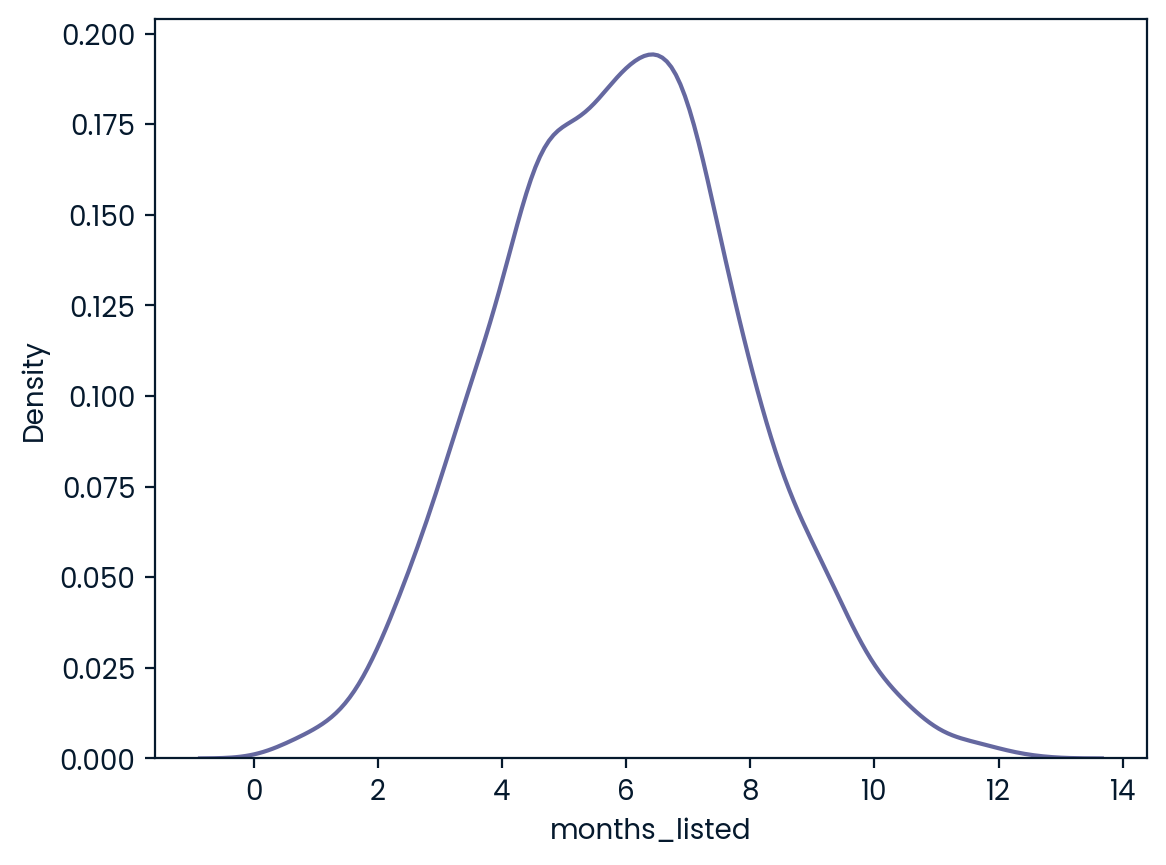

In [4]:
# plot the distrbution of the months_listed which has misisng values (to assert the use of mean or median)
sns.kdeplot(data=df, x='months_listed')
plt.show()


## Data Preparation

In [5]:
# load the data
df = pd.read_csv('house_sales.csv')

# format the city column "--" replace with 'Unknown'
df['city'] = df['city'].replace("--",'Unknown')

# fill the missing value with mean for months_listed
df['months_listed'] =  df['months_listed'].fillna(df['months_listed'].mean())
df['months_listed'] = round(df['months_listed'],1)

# format the string to be standardized for house_type
df['house_type'] = df['house_type'].replace({'Det.':'Detached','Terr.':'Terraced','Semi':'Semi-detached'})

# strip the string 's.q.m' for area
df['area'] = df['area'].str.replace(' sq.m.','')

# cast to float64
df['area'] = df['area'].astype('float64')
df['area'] = round(df['area'],1)

#  cast the sale_date column to date time (to return to this if return error)
df['sale_date'] = pd.to_datetime(df['sale_date'],errors='coerce')

# add a column that separate the price into 4 category (low,medium,high,very_high)
bins =[0,150000,300000,400000,600000]
labels = ['Low', 'Medium', 'High', 'Very High']

# add a column of the category
df['sale_category'] = pd.cut(df['sale_price'],bins=bins,labels=labels)

# copy the validated data into a clean_data variable
clean_data = df.copy()

## Looking into clean data

In [6]:
clean_data.head()

house_id        city  sale_price  ...     house_type   area  sale_category
0   1217792  Silvertown       55943  ...  Semi-detached  107.8            Low
1   1900913  Silvertown      384677  ...       Detached  498.8           High
2   1174927   Riverford      281707  ...       Detached  542.5         Medium
3   1773666  Silvertown      373251  ...       Detached  528.4           High
4   1258487  Silvertown      328885  ...       Detached  477.1           High

[5 rows x 9 columns]

In [7]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   house_id       1500 non-null   int64         
 1   city           1500 non-null   object        
 2   sale_price     1500 non-null   int64         
 3   sale_date      1500 non-null   datetime64[ns]
 4   months_listed  1500 non-null   float64       
 5   bedrooms       1500 non-null   int64         
 6   house_type     1500 non-null   object        
 7   area           1500 non-null   float64       
 8   sale_category  1500 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 95.5+ KB


# Explotaratory Data Analysis

## Categorical Data

- Silvertown has the most number of house, in that Detached house is leading type and bedroom 4,5,6 are the most listed(Most populated city). In term of price it is 2nd most expensive.

If we were to rank the city according to Population: 
- Populated urban - Silvertown
- Developed Township - Teasdale, Poppleton 
- Moderate Suburban - Riverford
- Low-Density Rural - Unknown

Detached is the most expensive and most preferred choice among population:
- Detached house_type - 200-600 sqm (median- 400)
- semi-detached - 100-280 sqm (median - 170)
- terraced - 100-280 sqm (median - 170)

Total area sq.meter - 528185.9 = 0.528 sq.km ( nearly the size of pentagon)

- 4,5,6 bedroom size are most built, indication of population have a larger family size from 4 to 10 where price increases as the BR increases

- Population prefered Detached house and BR 4-6 indication of strong traditional and family values preferring high level of privacy.(Assumption)

- In term of price, Developed Township Teasdale is most expensive with highest price over 500k and its lowest price is above of any other city.Reason could be land is fully developed with no more available land or hold either strategical importance in logistic or tourist attraction place.(Assumption)

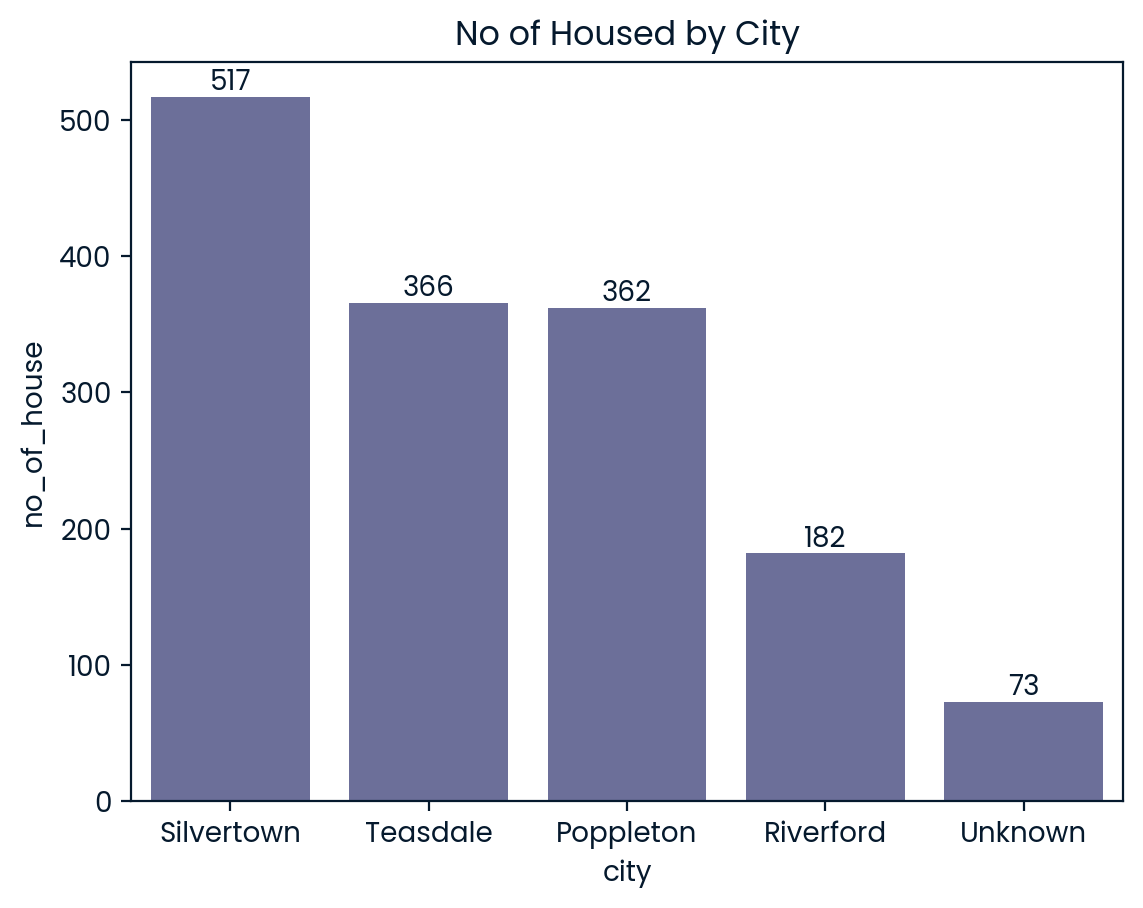

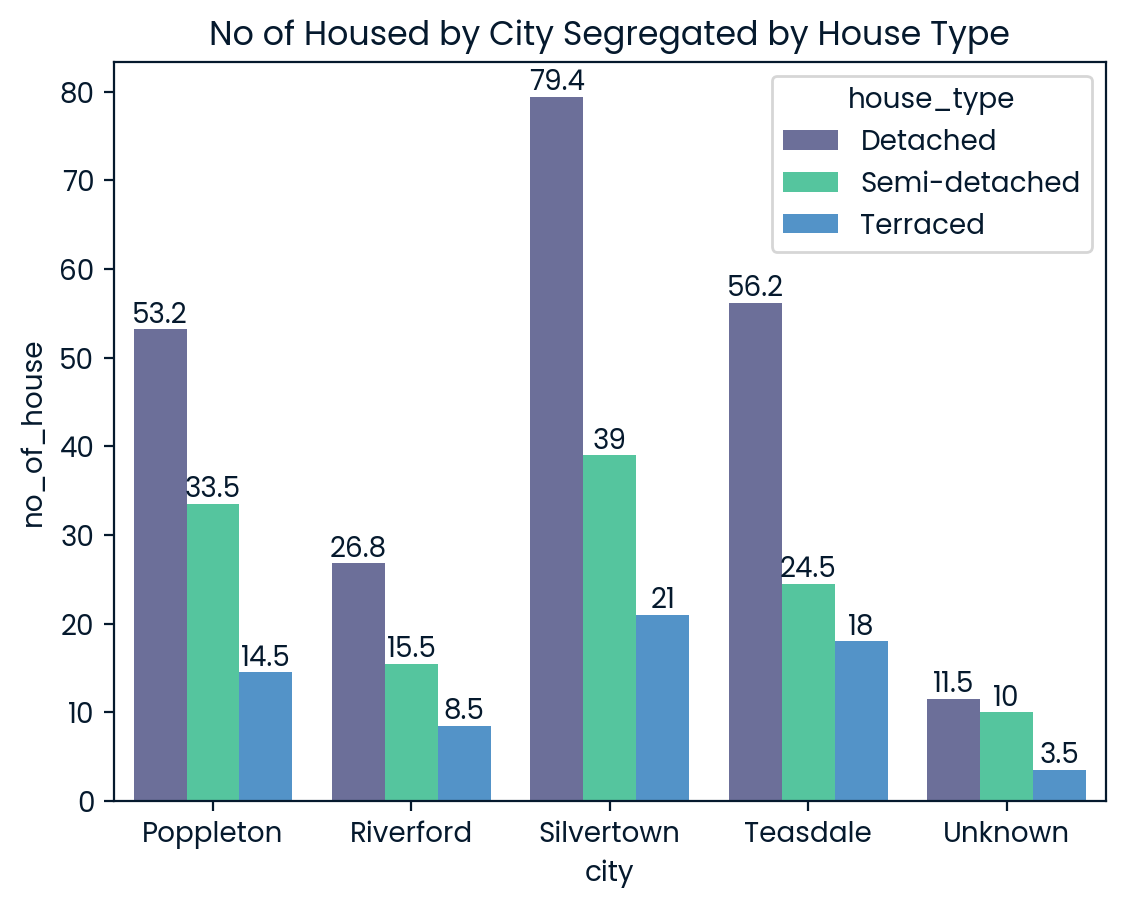

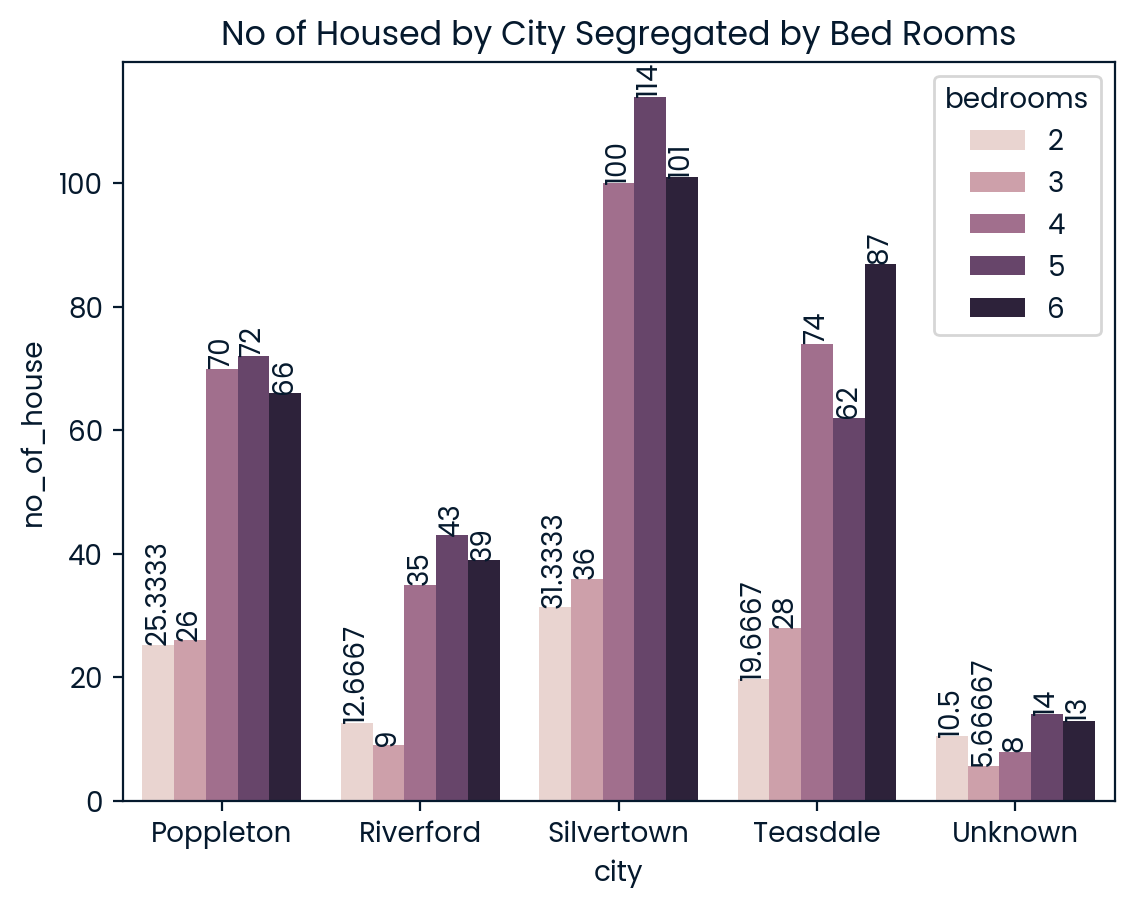

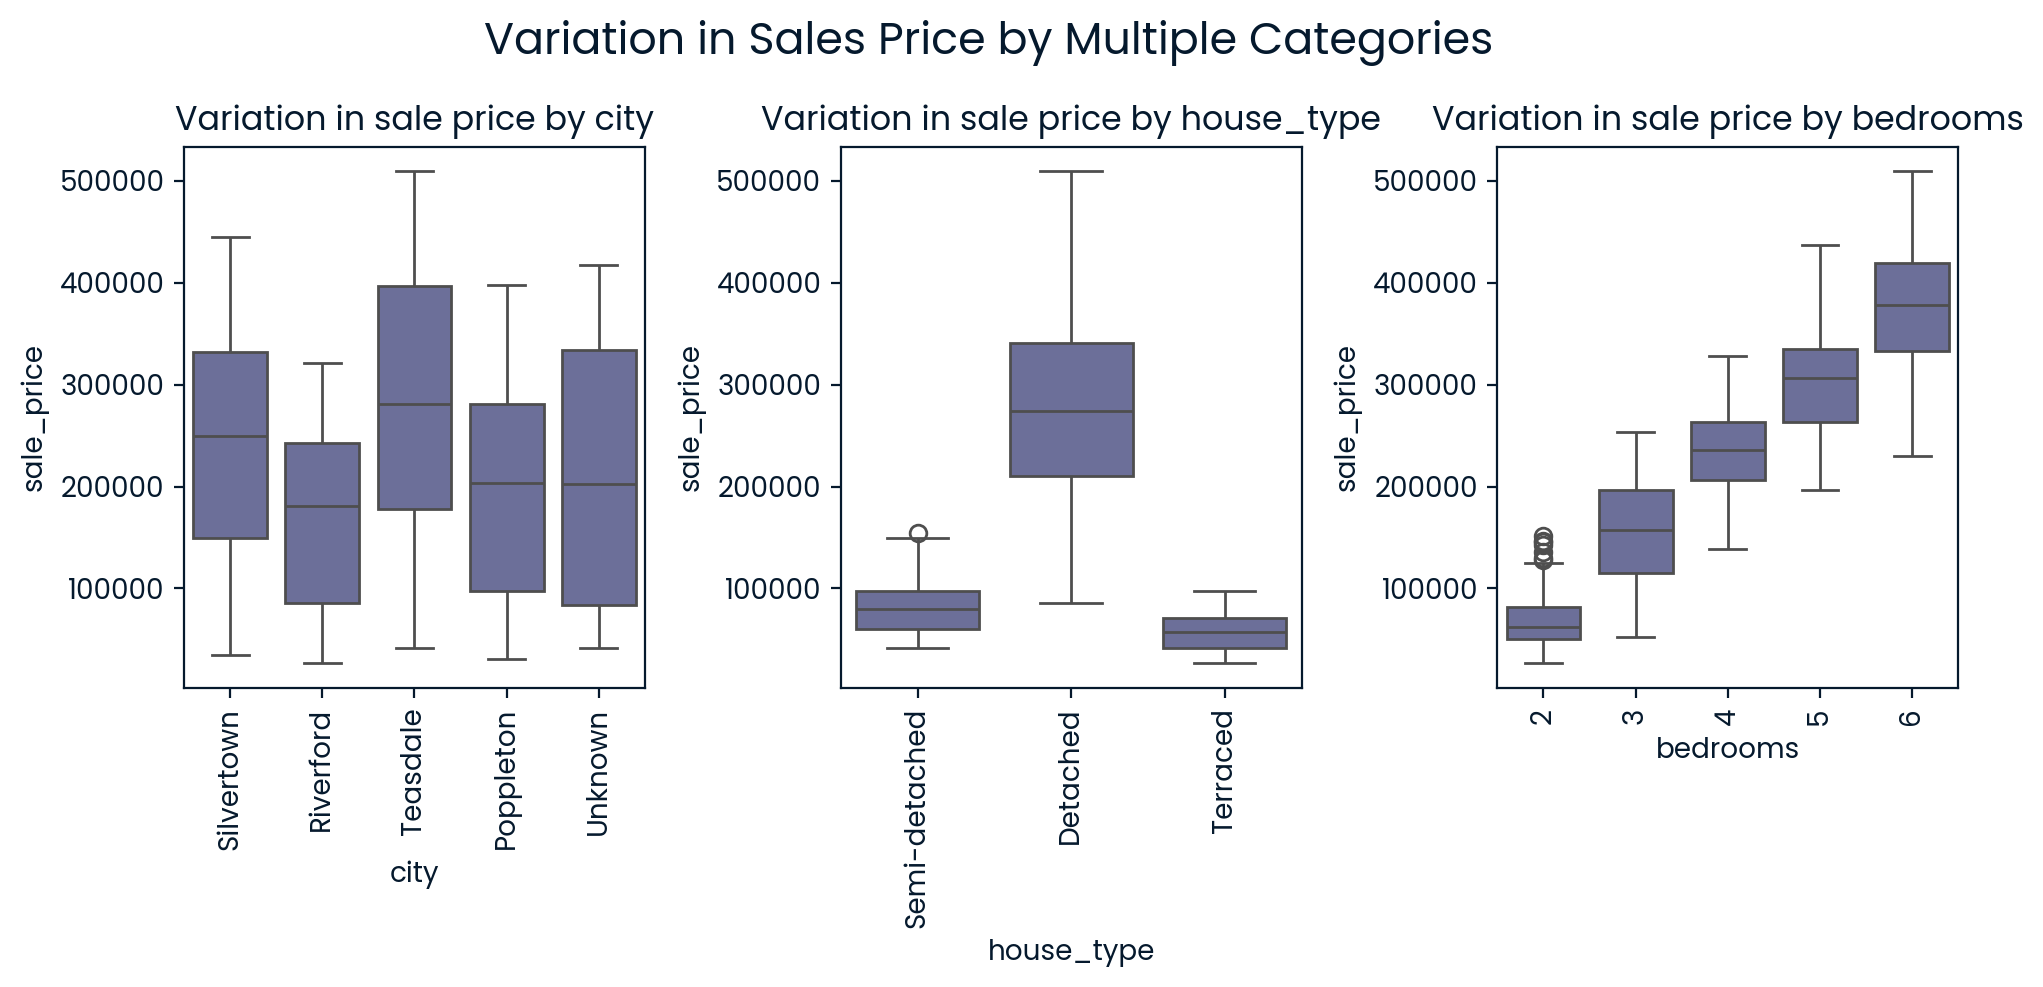

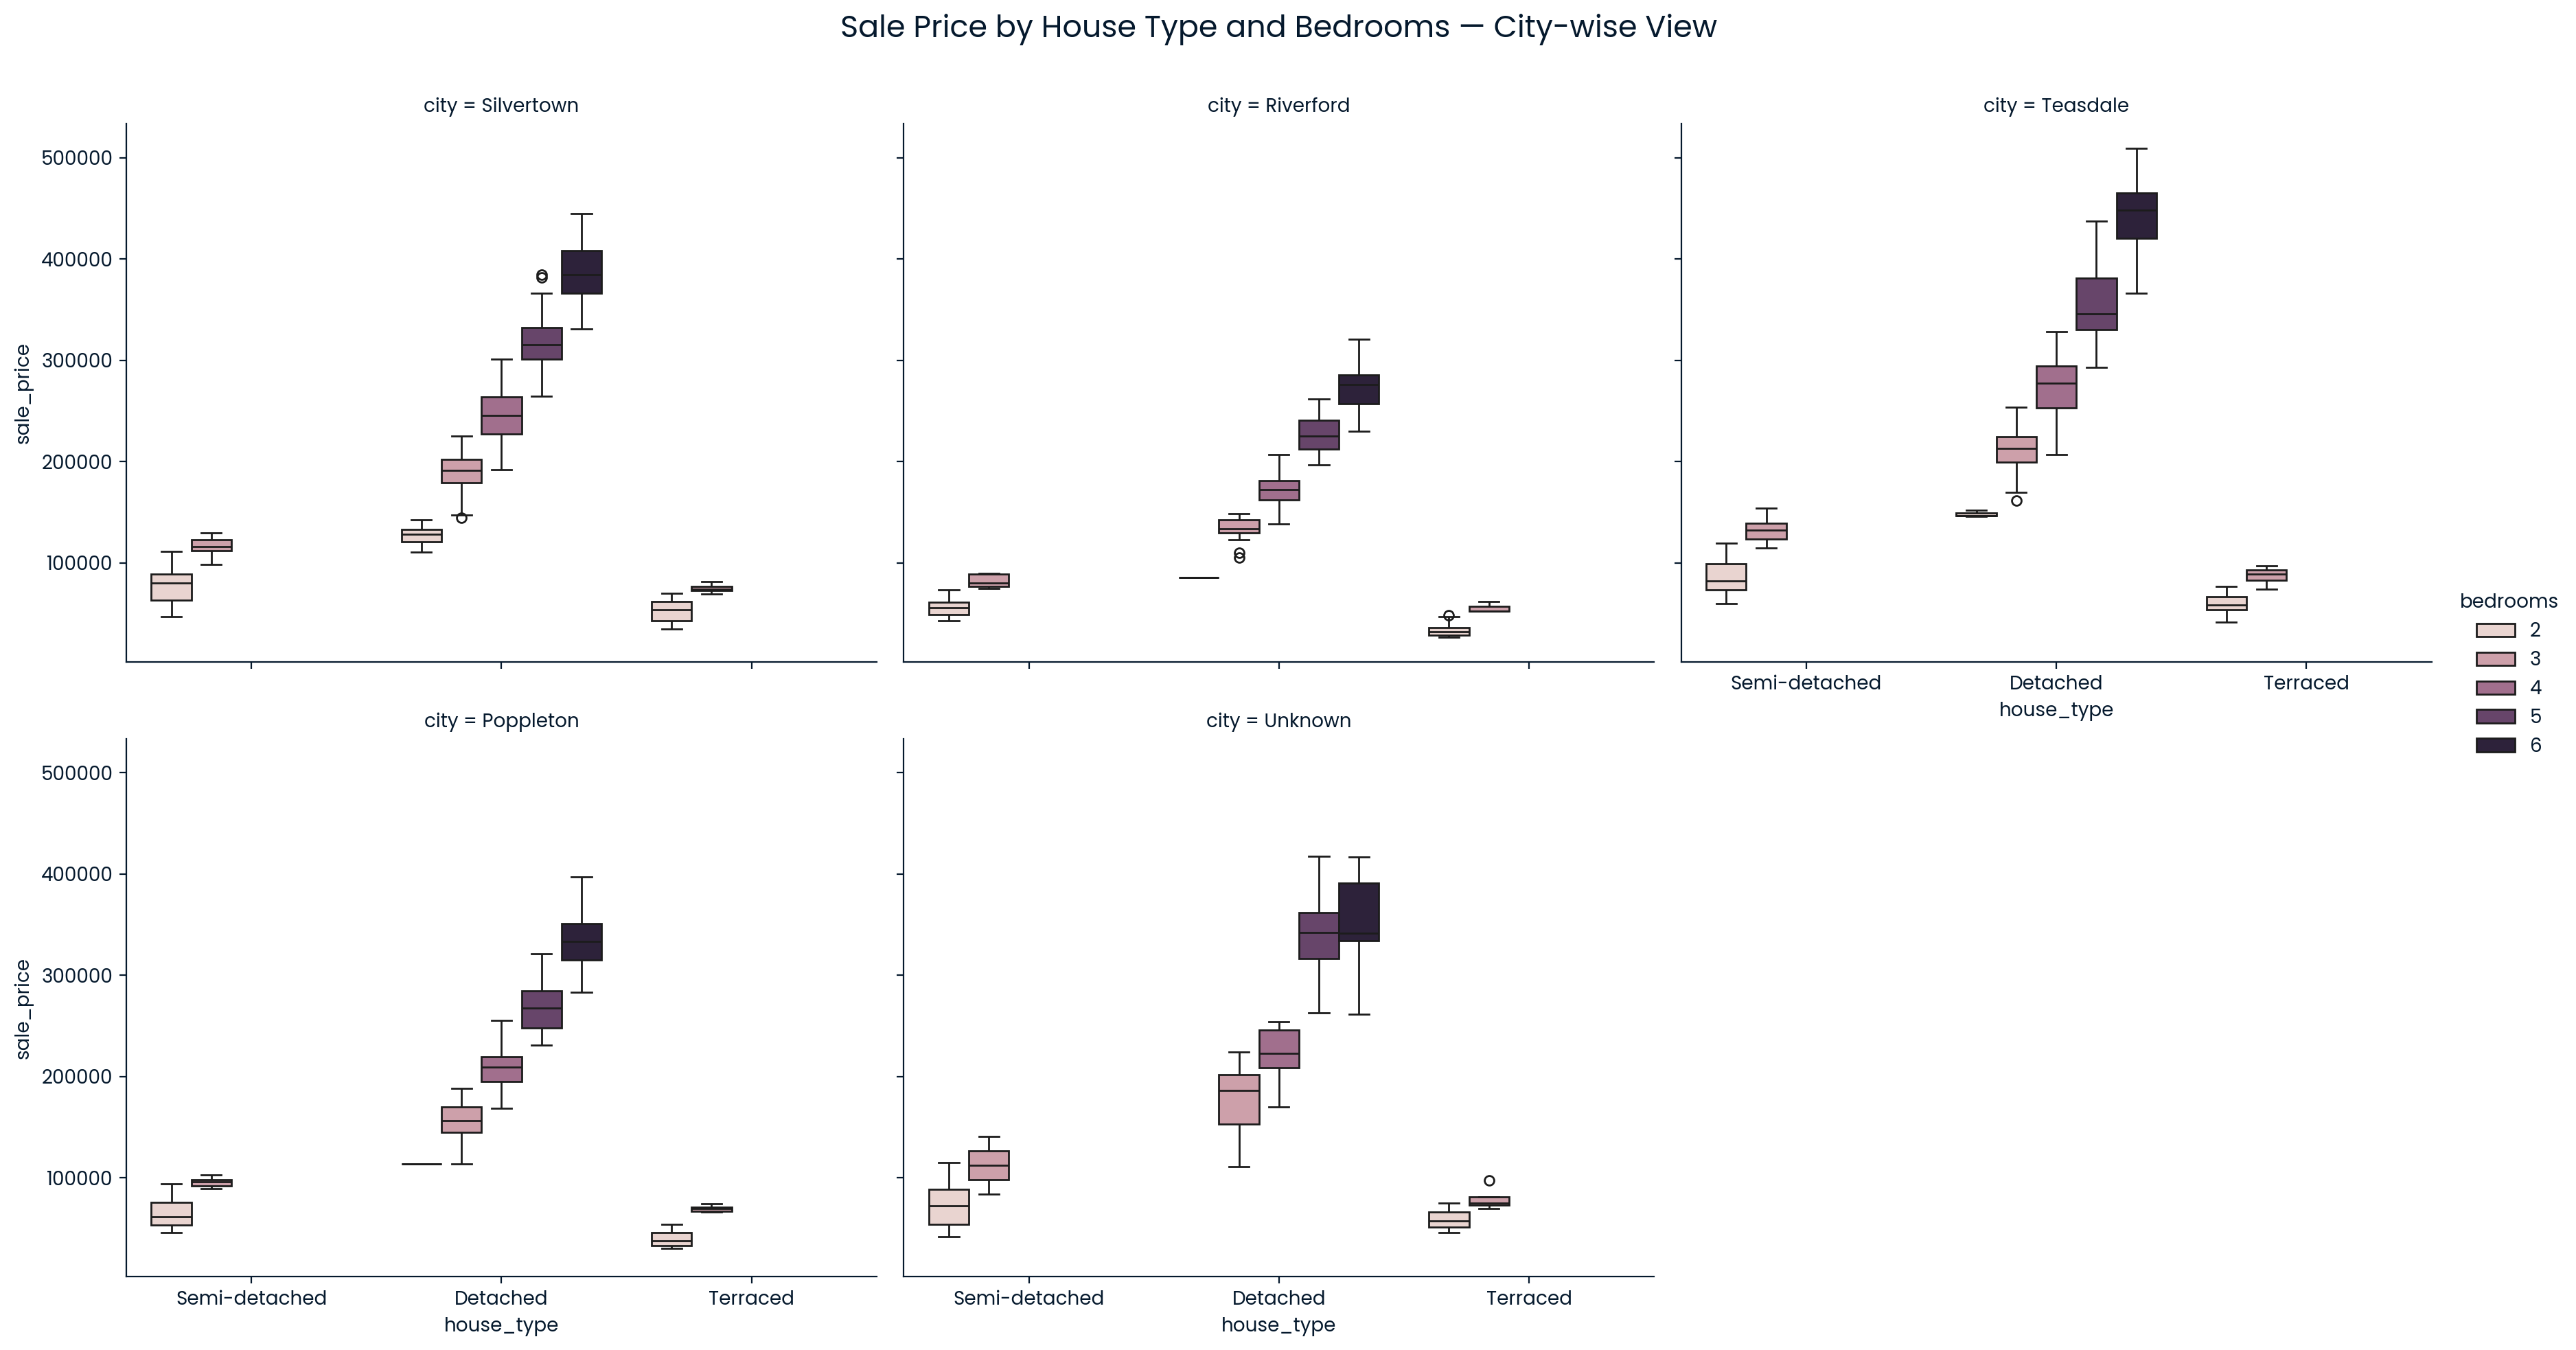

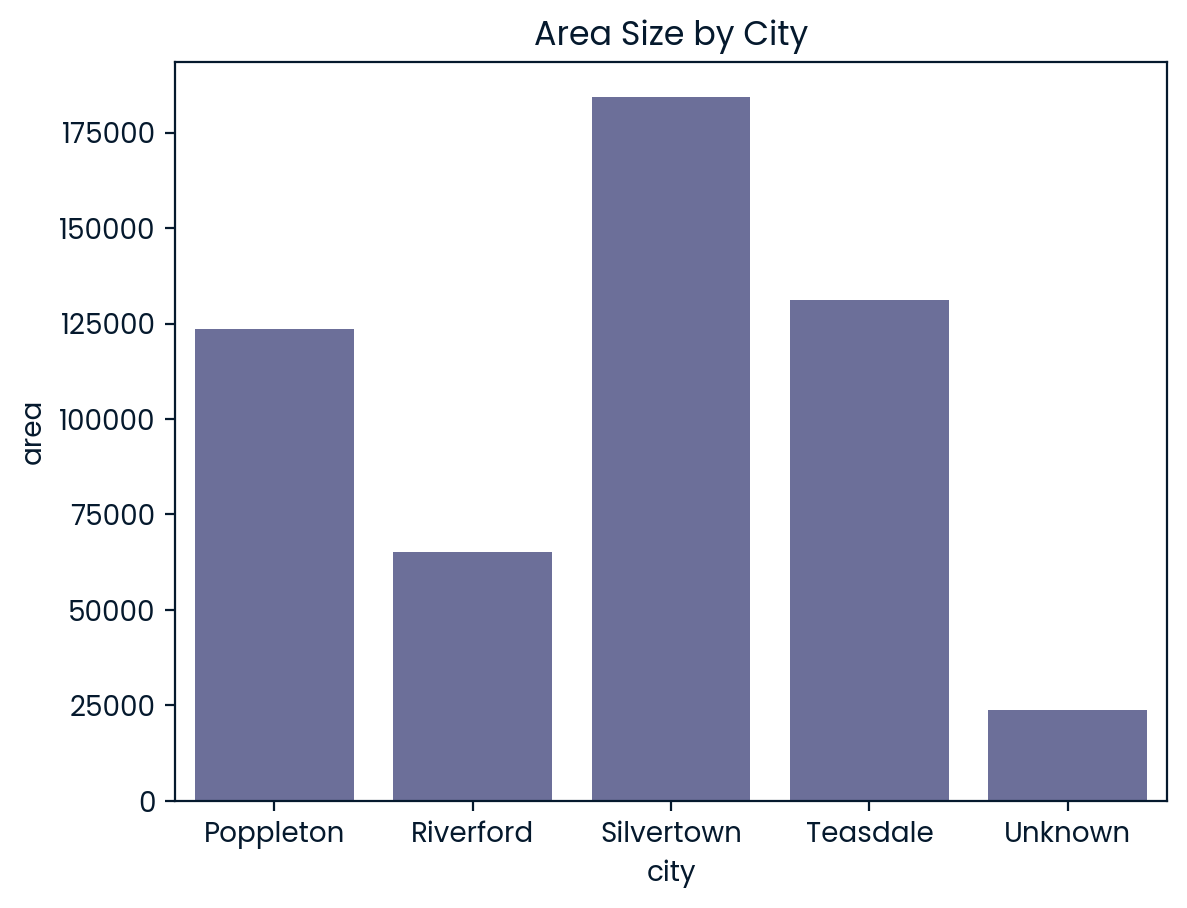

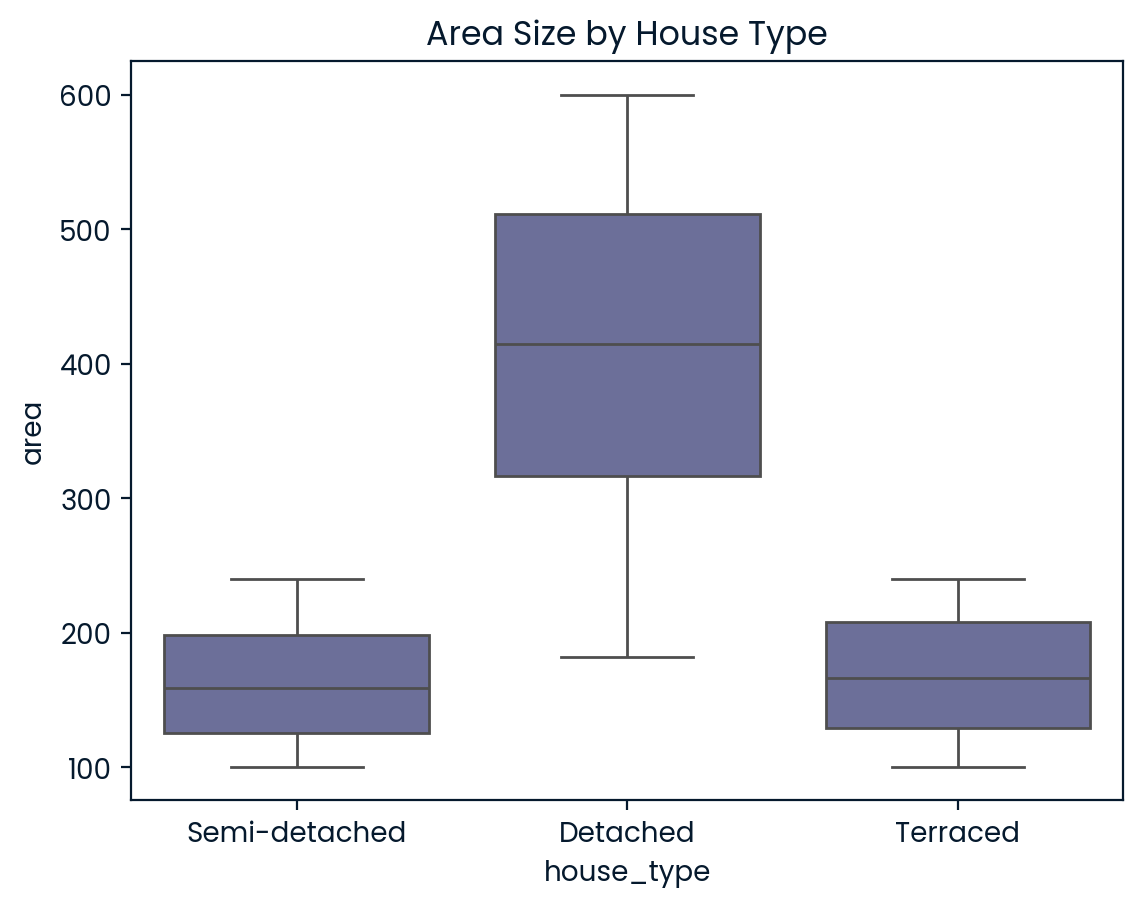

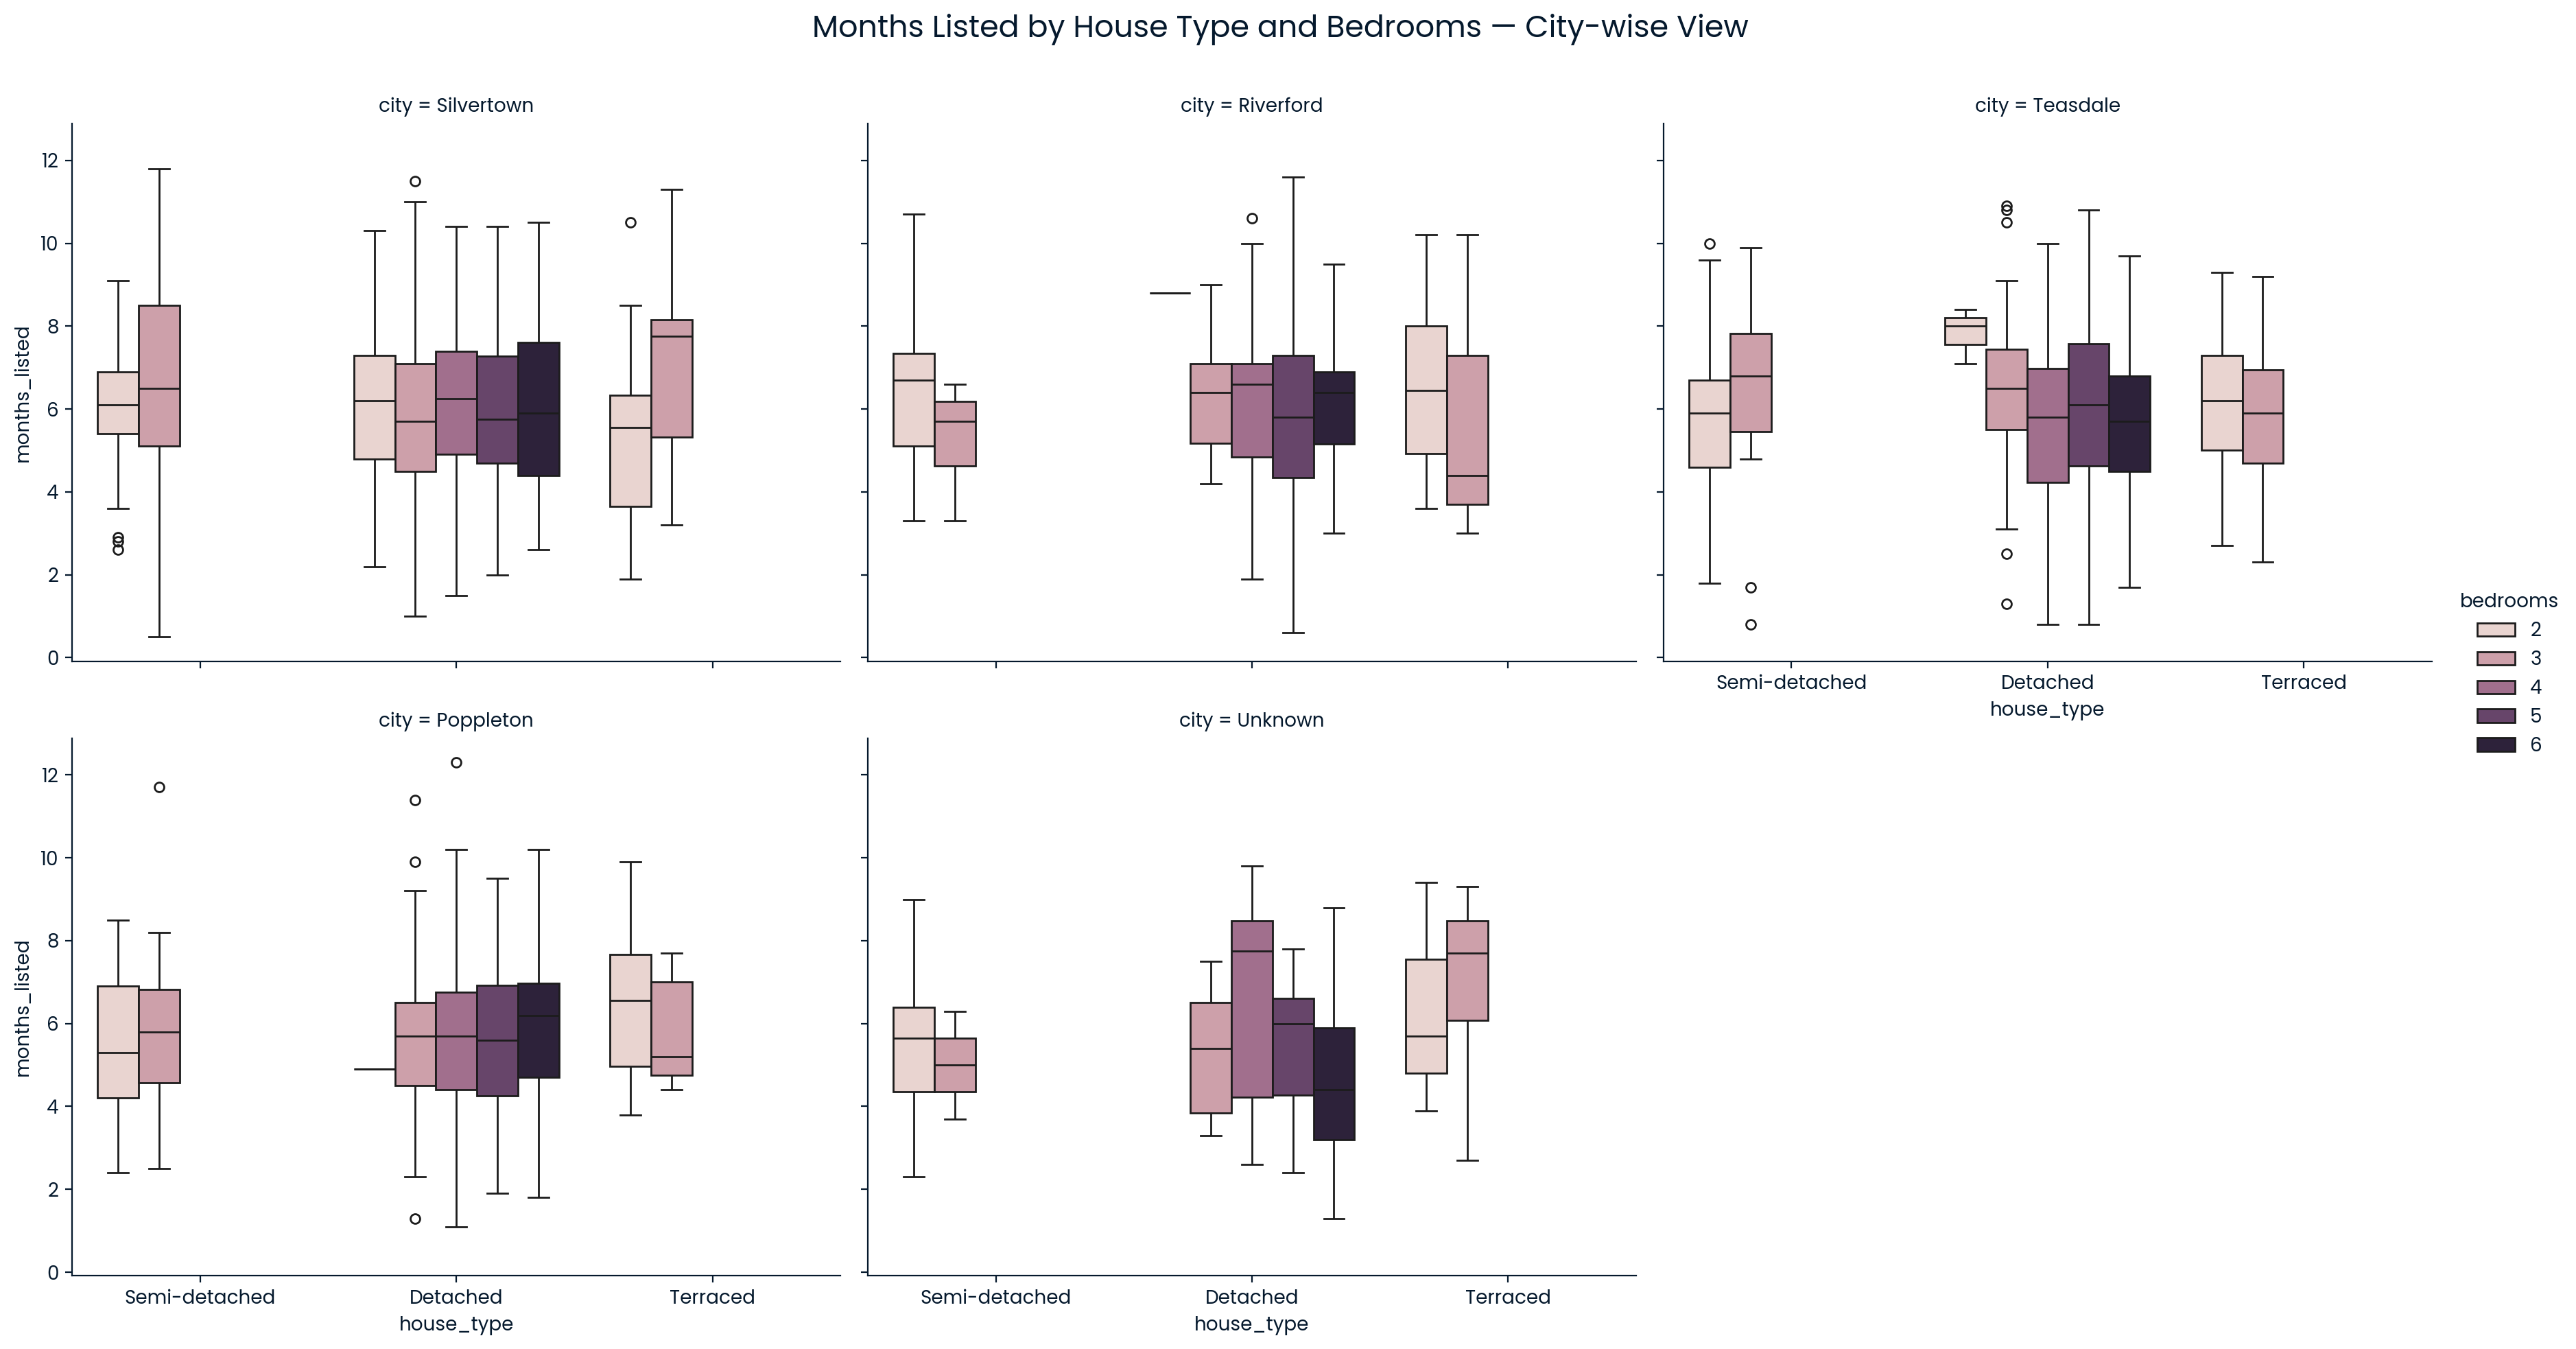

In [8]:
category = ['city','house_type','bedrooms']

# count the no of houses in each city
house_count_by_city = clean_data['city'].value_counts().reset_index()

# rename the columns
house_count_by_city.columns = ['city','no_of_house']

# plot the no of house in each city
ax_bar_plot = sns.barplot(data=house_count_by_city,x='city',y='no_of_house')

# label the bar plots
for i in ax_bar_plot.containers:
    ax_bar_plot.bar_label(i)
plt.title('No of Housed by City')
plt.show()

# no of house in each city segregated by house_type
city_house_type = clean_data.groupby(['city','house_type','bedrooms'],as_index=False).agg(no_of_house=('house_id','count'))
city_house_type

# plot the no of house in each city segregated by house_type
ax_stacked_bar_plot = sns.barplot(data=city_house_type,x='city',y='no_of_house',hue='house_type',ci=None)

# label the bar plots
for i in ax_stacked_bar_plot.containers:
    ax_stacked_bar_plot.bar_label(i)
plt.title('No of Housed by City Segregated by House Type')
plt.show()


# No of property listed by bed room type
ax_stacked_bar_plot_bedroom = sns.barplot(data=city_house_type,x='city',y='no_of_house',hue='bedrooms',ci=None)

# label the bar plots of for bed room type
for container in ax_stacked_bar_plot_bedroom.containers:
    labels = ax_stacked_bar_plot_bedroom.bar_label(container, label_type='edge')
    for label in labels:
        label.set_rotation(90)
plt.title('No of Housed by City Segregated by Bed Rooms')
plt.show()


# draw empty canvas
fig,axes = plt.subplots(1,3,figsize=(10,5))

# plot the sale price in each city
for i,col in enumerate(category):
    ax=axes[i]
    sns.boxplot(data=clean_data,x=col,y='sale_price',ax=ax)
    ax.set_title(f'Variation in sale price by {col}')
    ax.tick_params(axis='x',rotation=90)
fig.suptitle('Variation in Sales Price by Multiple Categories', fontsize=16)
plt.tight_layout()
plt.show()

# sale price variation by city < house_type < bedrooms
sns.catplot(data=clean_data,x='house_type',y='sale_price',hue='bedrooms',col='city',col_wrap=3, kind='box',height=5,aspect=1.2)
plt.subplots_adjust(top=0.9)
plt.suptitle('Sale Price by House Type and Bedrooms — City-wise View',fontsize=16)
plt.show()


# Area size of each city
city_area = clean_data.groupby('city',as_index=False).agg(area=('area','sum'))

# plot the area size of each city
sns.barplot(data=city_area,x='city',y='area')
plt.title('Area Size by City')
plt.show()

# Plot Area variation for house type
sns.boxplot(data=clean_data,x='house_type',y='area')
plt.title('Area Size by House Type')
plt.show()

# Plot Duration vairation by city < house_type
sns.catplot(data=clean_data,x='house_type',y='months_listed',hue='bedrooms',col='city',col_wrap=3,kind='box',height=5,aspect=1.2)
plt.subplots_adjust(top=0.9)
plt.suptitle('Months Listed by House Type and Bedrooms — City-wise View',fontsize=16)
plt.show()

## Price Elasticity of listed houses

### Price elasticity 
- Silver town : high elasticity for mid-tier home
- Riverford : inconsistency in price for detached : supply demand mismatch 
- Teasdale : High price elasticy as price increase consistently (luxury buyer - willing to pay higher price for more space )
- Poppleton : for detached price increases as BR increases : Healthy price elasticity
- Unknown : data issue or outlier

Silver town has increasing demand with supplying catching up but demand exccedd the supply with increase in average price year on year. If the **demand** were to **increase by 10%**, the price increase would fall **between 8% - 10%** with **forecasted prices of 263,866 -  268,752**.

In [9]:
# Price elasticity table
clean_data.groupby(['city', 'house_type', 'bedrooms'])['sale_price'].median().unstack().diff(axis=1)

bedrooms                   2        3        4         5         6
city       house_type                                             
Poppleton  Detached      NaN  42914.0  52833.0   58346.0   65953.0
           Semi-detached NaN  34689.5      NaN       NaN       NaN
           Terraced      NaN  31700.0      NaN       NaN       NaN
Riverford  Detached      NaN  48086.0  38564.0   52969.0   51399.0
           Semi-detached NaN  24210.0      NaN       NaN       NaN
           Terraced      NaN  20389.0      NaN       NaN       NaN
Silvertown Detached      NaN  63284.0  53895.5   70402.0   68574.5
           Semi-detached NaN  36229.0      NaN       NaN       NaN
           Terraced      NaN  20165.5      NaN       NaN       NaN
Teasdale   Detached      NaN  66299.0  64337.5   68632.0  102730.5
           Semi-detached NaN  49902.0      NaN       NaN       NaN
           Terraced      NaN  30483.0      NaN       NaN       NaN
Unknown    Detached      NaN      NaN  36927.5  119278.0    -391.5
           Semi-detached NaN  40306.5      NaN       NaN       NaN
           Terraced      NaN  17471.0      NaN       NaN       NaN

## Numerical Data

- Most of property falls between the price range of 200k-340k with over 500k property limited units  listed in the market, where under 200k is abudance in market. 

- There is linear relation between the Sale price and area which tells as the area (BR) inceases the price also increases and we observed that Detached house has the most area refelected by higher price than other house types.



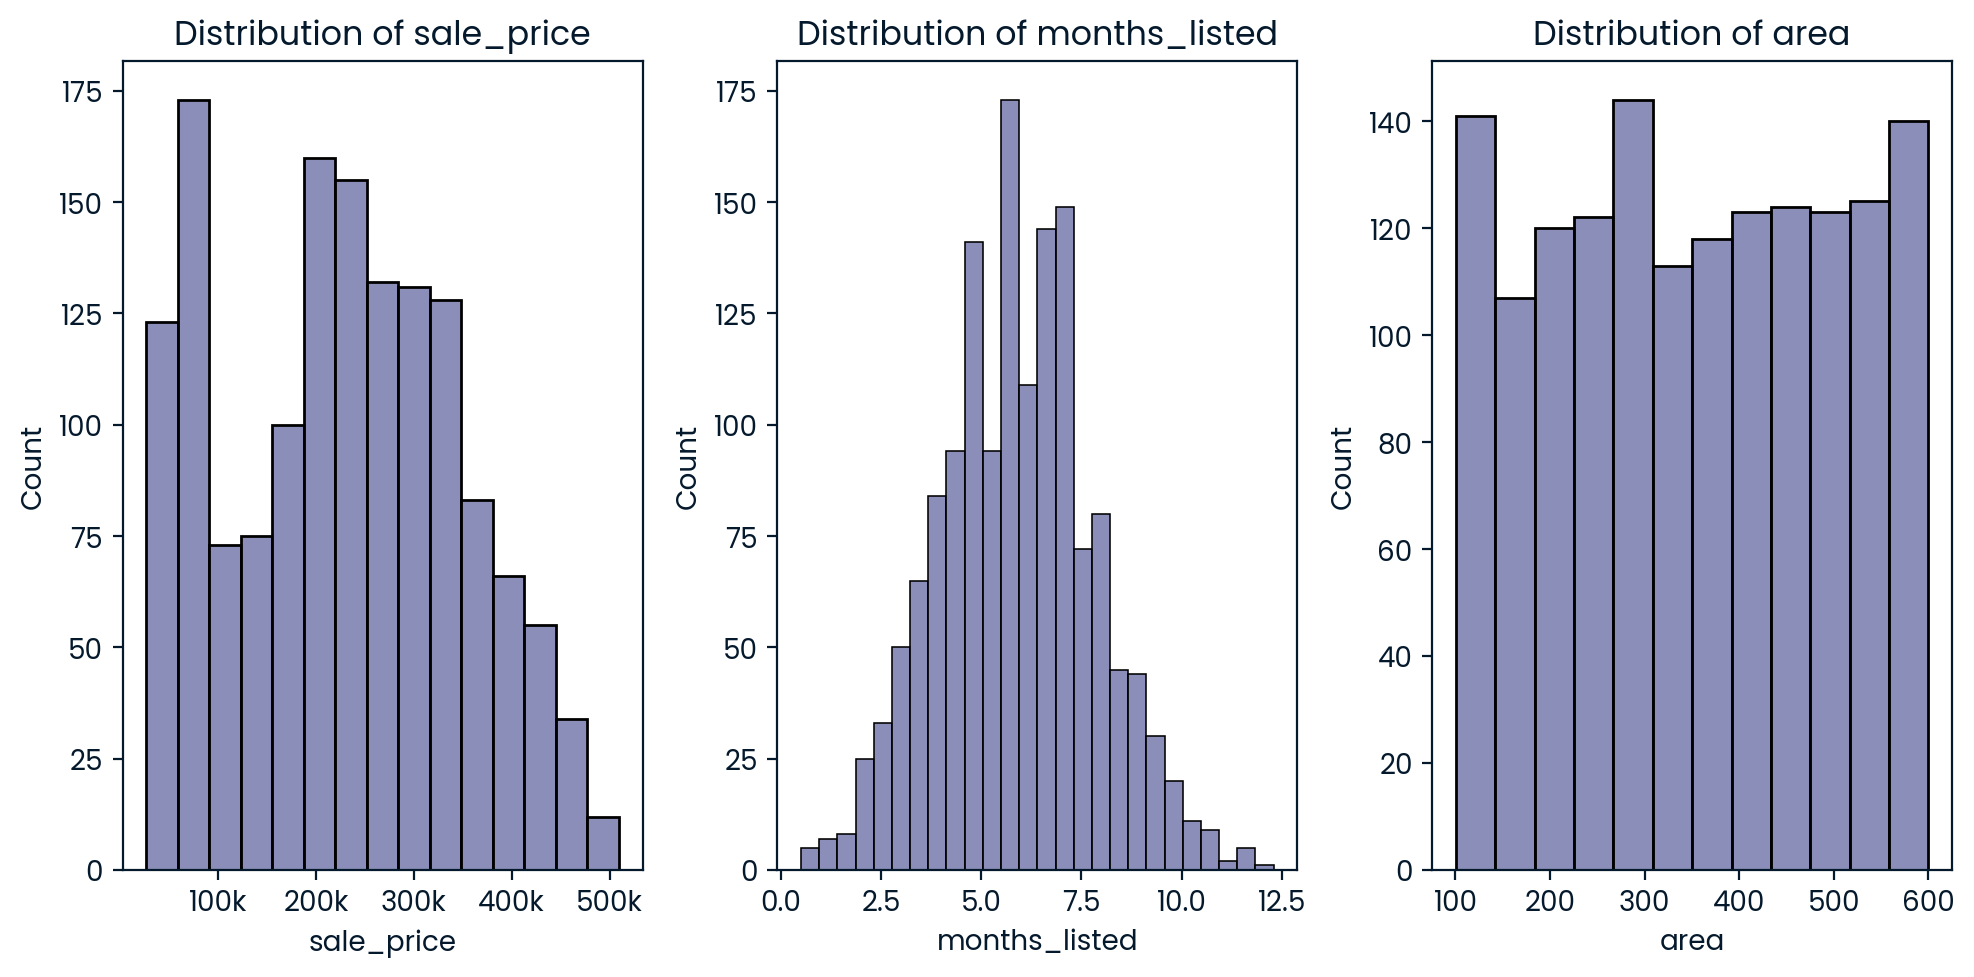

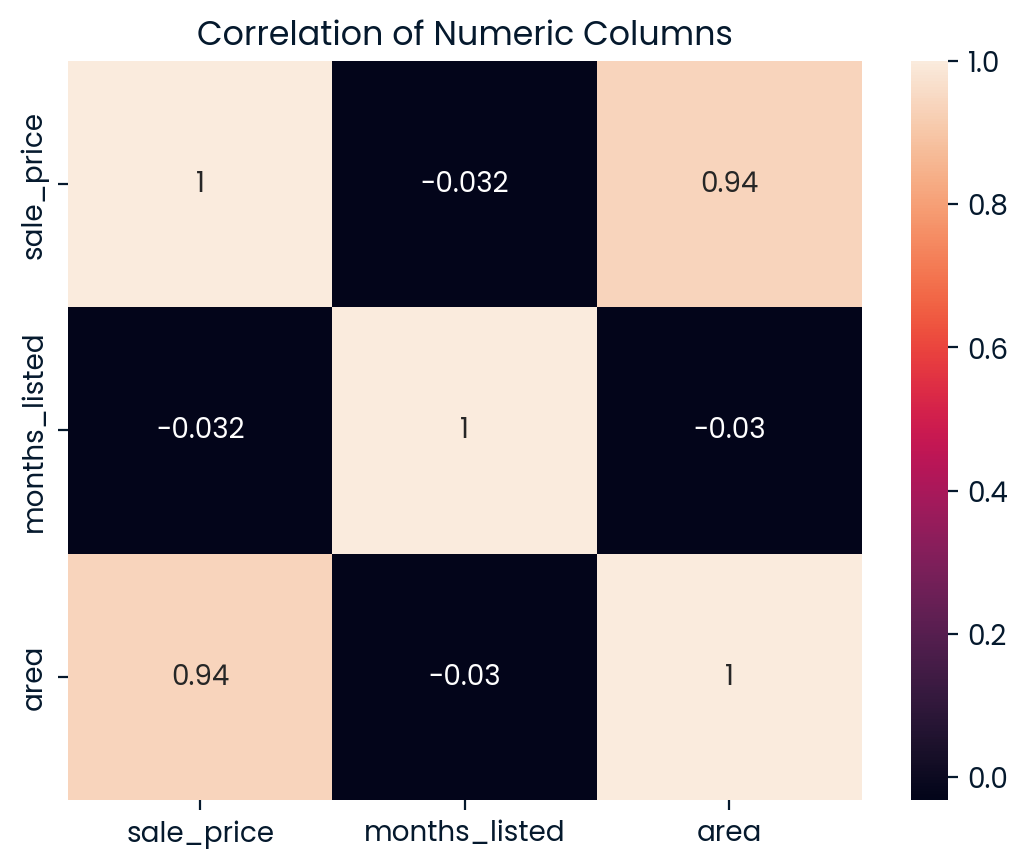

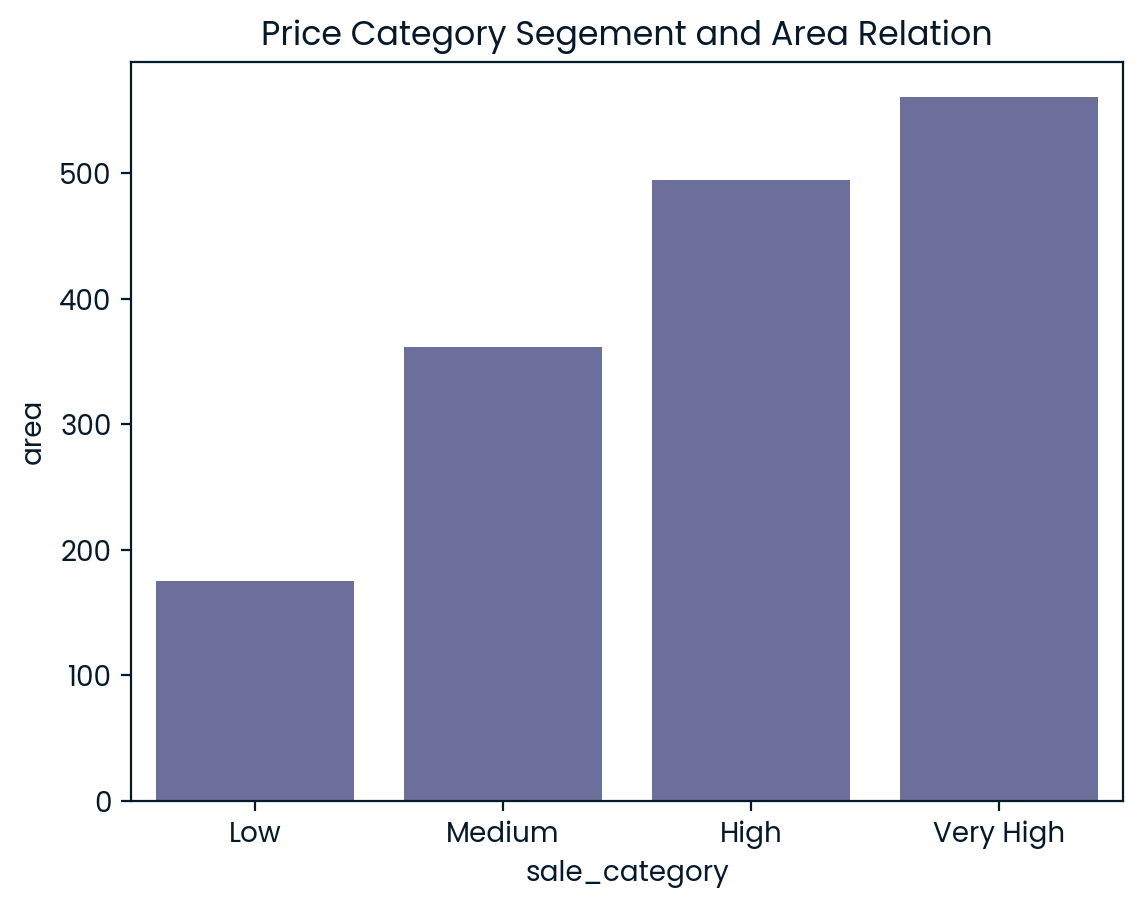

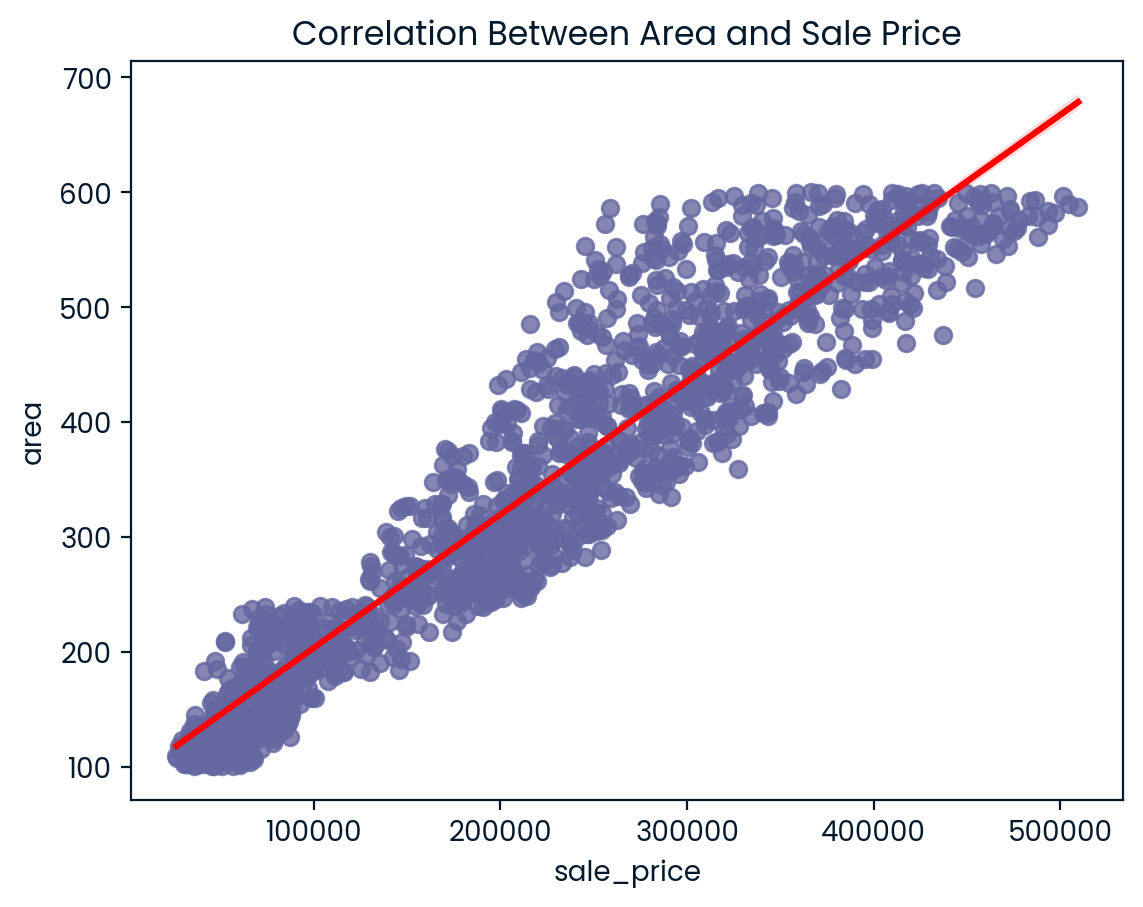

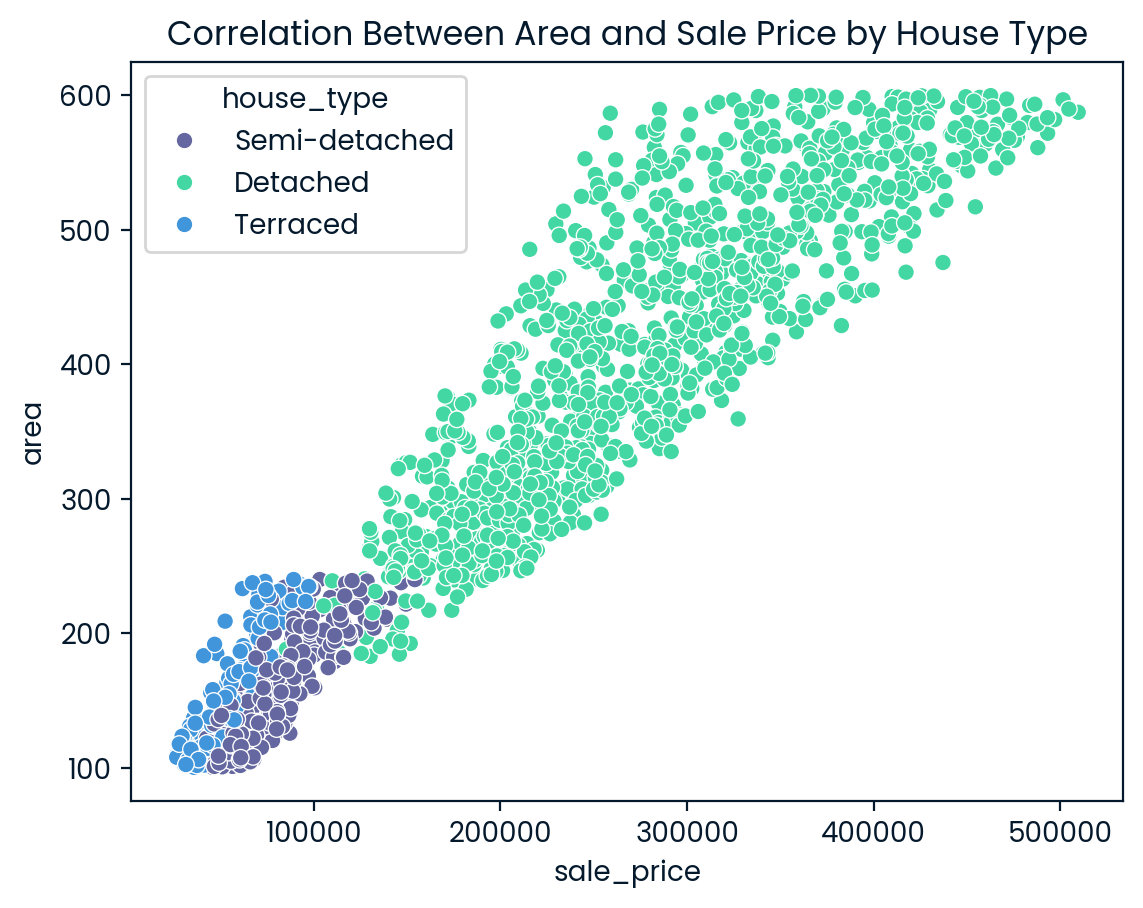

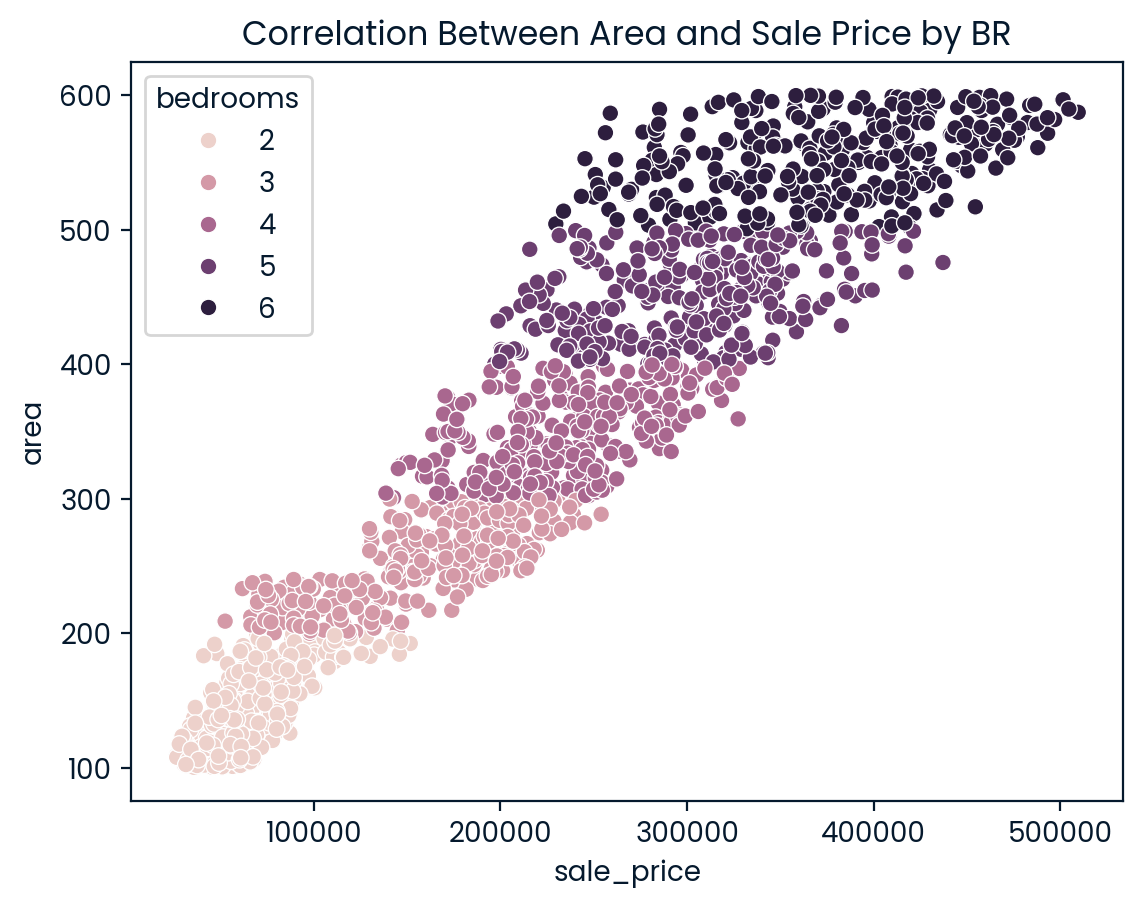

In [10]:
# import the FuncFormat to format the sales values to human readable format
from matplotlib.ticker import FuncFormatter

# Create a format function
def human_format(x,pos):
    if x >= 1e6:
        return f'{x*1.0e-6:.1f}M'
    elif x >= 1e3:
        return f'{x*1.0e-3:.0f}k'
    else:
        return int(x)
        
# defined format
formatter = FuncFormatter(human_format)

# list of columns to pass
numeric =['sale_price','months_listed','area']

# draw blank canvas 
fig,axes = plt.subplots(1,3,figsize=(10,5))

# loop the distribution for selected columns
for i, col in enumerate(numeric):
    ax =axes[i]
    sns.histplot(data=clean_data,x=col,ax=ax)
    ax.set_title (f'Distribution of {col}')
    #apply human format to sale price column
    if col == 'sale_price':
        ax.xaxis.set_major_formatter(formatter)
    
plt.tight_layout()
plt.show()

# Plot heatmap
sns.heatmap(data=clean_data[numeric].corr(),annot=True)
plt.title('Correlation of Numeric Columns')
plt.show()

# plot bar plot 
sns.barplot(data=clean_data,x='sale_category',y='area',ci=None)
plt.title('Price Category Segement and Area Relation')
plt.show()

# plot reg plot
sns.regplot(data=clean_data,x='sale_price',y='area',line_kws={'color':'red'})
plt.title('Correlation Between Area and Sale Price')
plt.show()

# plot scatter plot
sns.scatterplot(data=clean_data,x='sale_price',y='area',hue='house_type')
plt.title('Correlation Between Area and Sale Price by House Type')
plt.show()

# plot the area/sale with segregation for the house type
sns.scatterplot(data=clean_data,x='sale_price',y='area',hue='bedrooms')
plt.title('Correlation Between Area and Sale Price by BR')
plt.show()




## Trend by Quarter

Added a column 'month_trunc' that group dates to corresponding month. E.g 2022-02-27 = 2020-02-01
Plot the trend on quarterly basis to make trend line visiable.
The trend line by quarter has too much noise and obscure the pattern. Further explore by year.

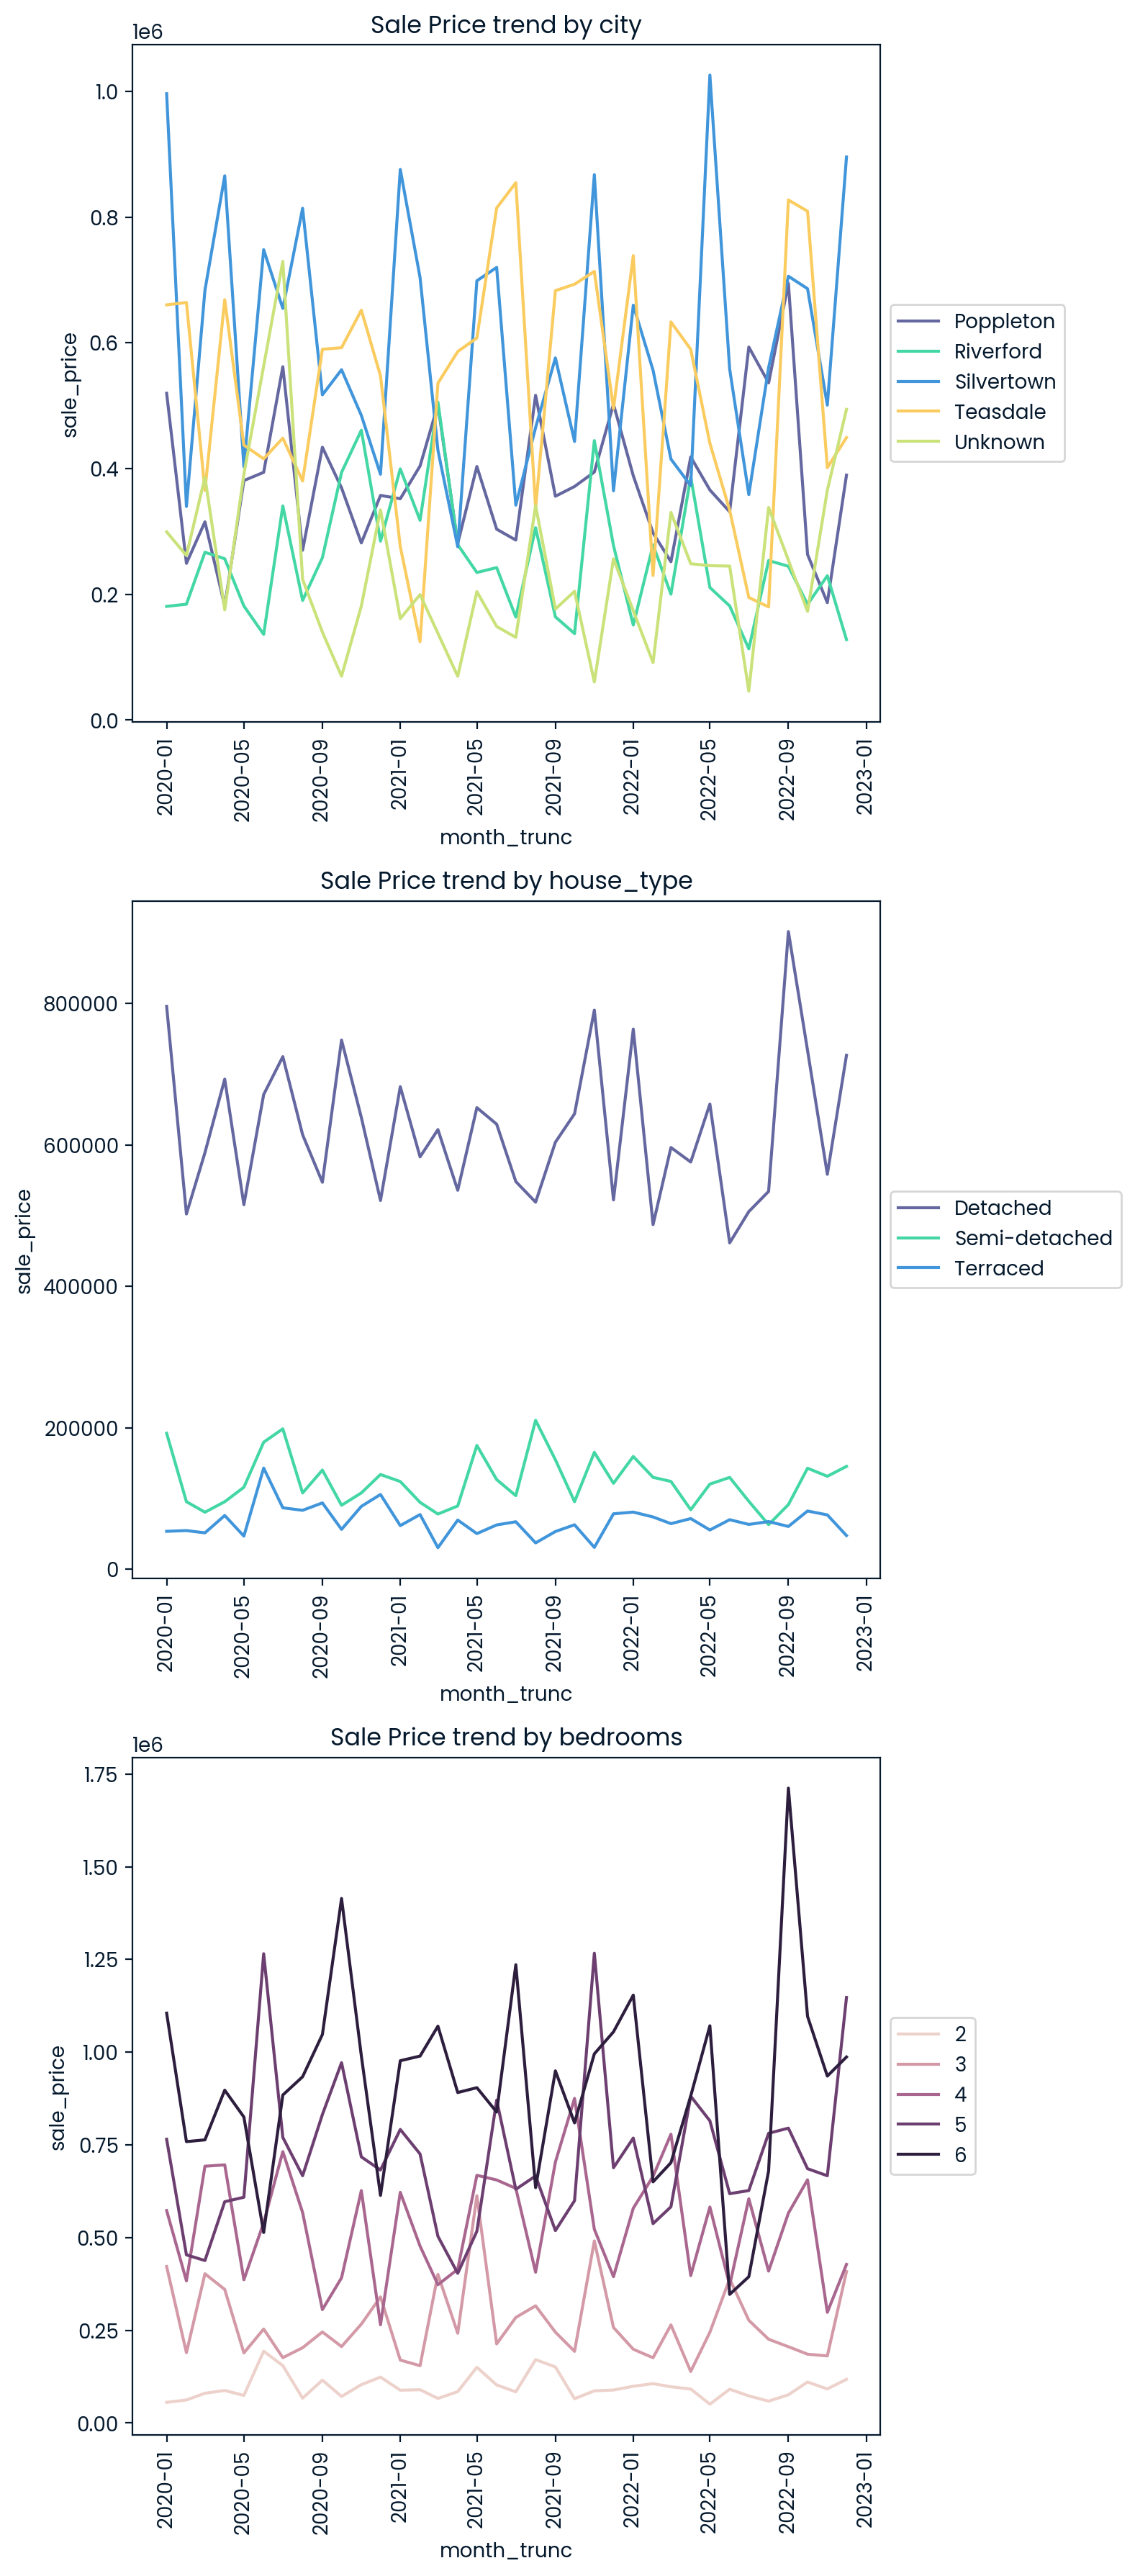

In [11]:
# df_temp['row_num']= df_temp.groupby(['month_trunc'],as_index=False).cumcount() +1
# df_temp


clean_data['month_trunc'] = clean_data['sale_date'].dt.to_period('M').dt.to_timestamp().sort_values().to_frame(name='month_trunc')

trend_sale = clean_data.groupby(['month_trunc','city','house_type','bedrooms'],as_index=False)['sale_price'].sum()

hue=['city','house_type','bedrooms']

fig,axes = plt.subplots(3,1,figsize=(8,18))
for i,col in enumerate(hue):
    ax =axes[i]
    sns.lineplot(data=trend_sale,x='month_trunc',y='sale_price',hue=col,ax=ax,ci=None)
    ax.set_title(f'Sale Price trend by {col}')
    ax.tick_params(axis='x',rotation=90)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()





## Trend by Year

There is an incident similar to COVID-19 pandamedic between start of 2020 to 2021 where house listed in Silver town (populated town) falls in listing while in developed urban area (Teasdale and Poppleton) increases. Evident by lower listing in populated area to increased listing in less dense developed urban area where it is more spacious that is prevetative for measurement again the air-born virus. This is an assumption reflecting of 2020 pandemadic. 

We can validate this statement by external information such as newspaper and covid case counts by the city to verify if the increase cases in populated area drive tenants to move out to less populuated and 

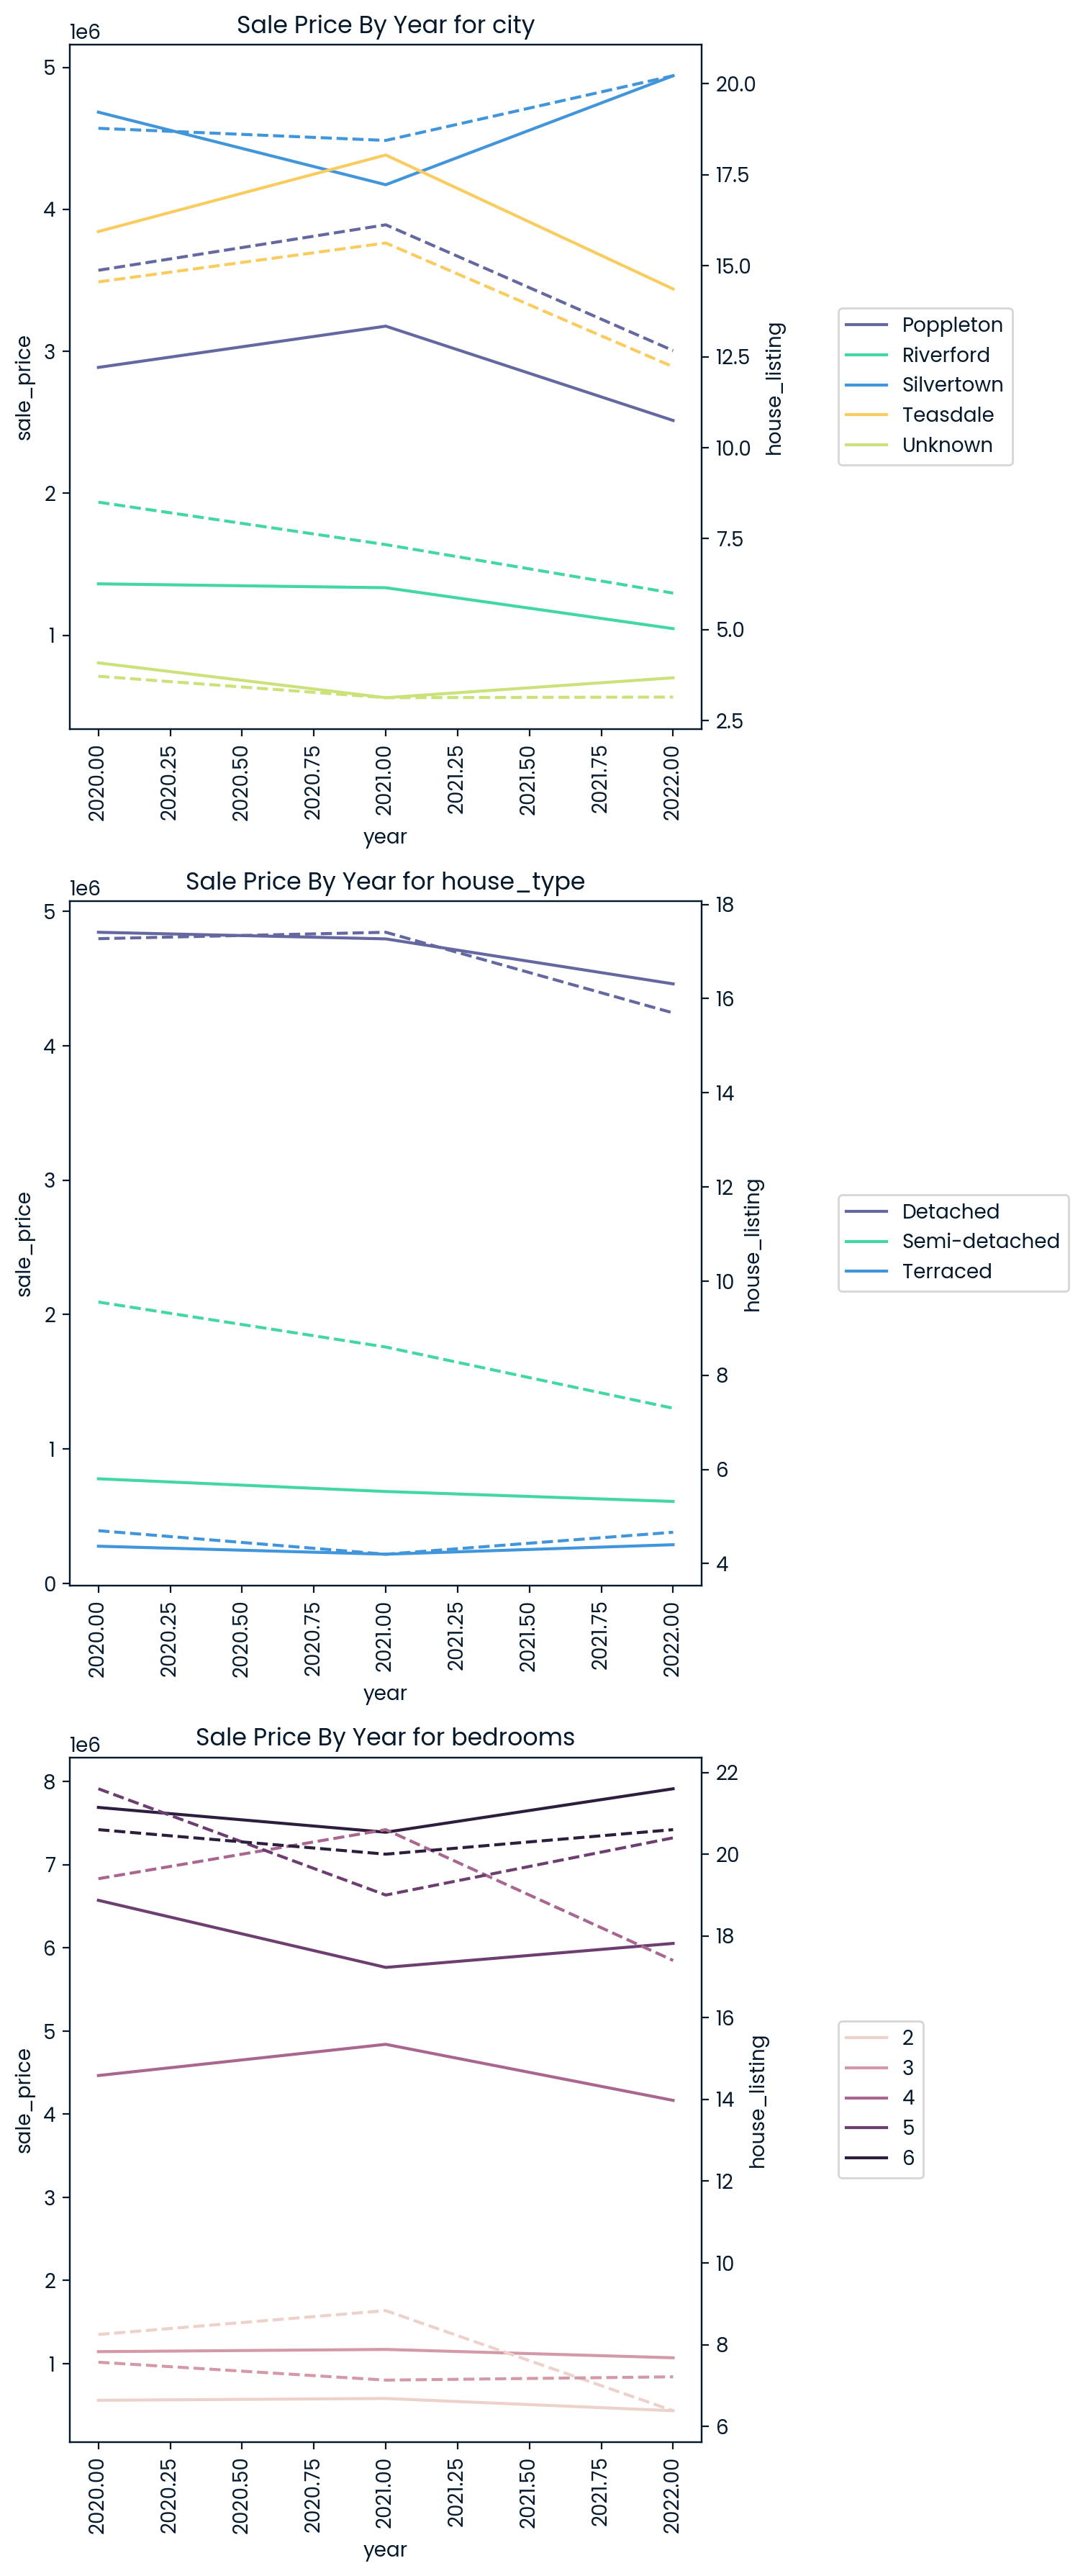

In [12]:
clean_data['year'] = clean_data['sale_date'].dt.year

trend_sale_year = clean_data.groupby(['year','city','house_type','bedrooms'],as_index=False)['sale_price'].sum()
trend_sale_unit_year = clean_data.groupby(['year','city','house_type','bedrooms'],as_index=False)['house_id'].count()
trend_sale_unit_year.columns = ['year','city','house_type','bedrooms','house_listing']

hue=['city','house_type','bedrooms']

fig,axes = plt.subplots(3,1,figsize=(8,18))
for i,col in enumerate(hue):
    ax =axes[i]
    sns.lineplot(data=trend_sale_year,x='year',y='sale_price',hue=col,ax=ax,ci=None)

    ax2 = ax.twinx()
    sns.lineplot(data=trend_sale_unit_year,x='year',y='house_listing',hue=col,ax=ax2,ci=None,linestyle='--',legend=False)
    
    ax.tick_params(axis='x',rotation=90)
    ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
    ax.set_title(f'Sale Price By Year for {col}')
    
plt.tight_layout()
plt.show()



### Analysis of the Average Sale Price Growth by City

![YOY sale growth](YOY%20sale%20growth.PNG)


# Building Machine Learning Model

### Linear Regression

The r square value is 0.962,
rmse USD 153.1667 and average CV score is 0.9653. This tell that model fits well to the data while the rmse is $153 which is very low error of varaince between the actual and predicted. The sale prices start from lowest of USD 20K - 500K, thus the variance is insignificant. 

The model works well on the unseen data, evident by average score of 0.9653.

The R-square value is: 0.9623234965291416
The RMSE value is: 153.16672633275053
[0.9623235  0.96411448 0.95984965 0.97326431 0.96714583]
Average cv_score is 0.9653395531282971


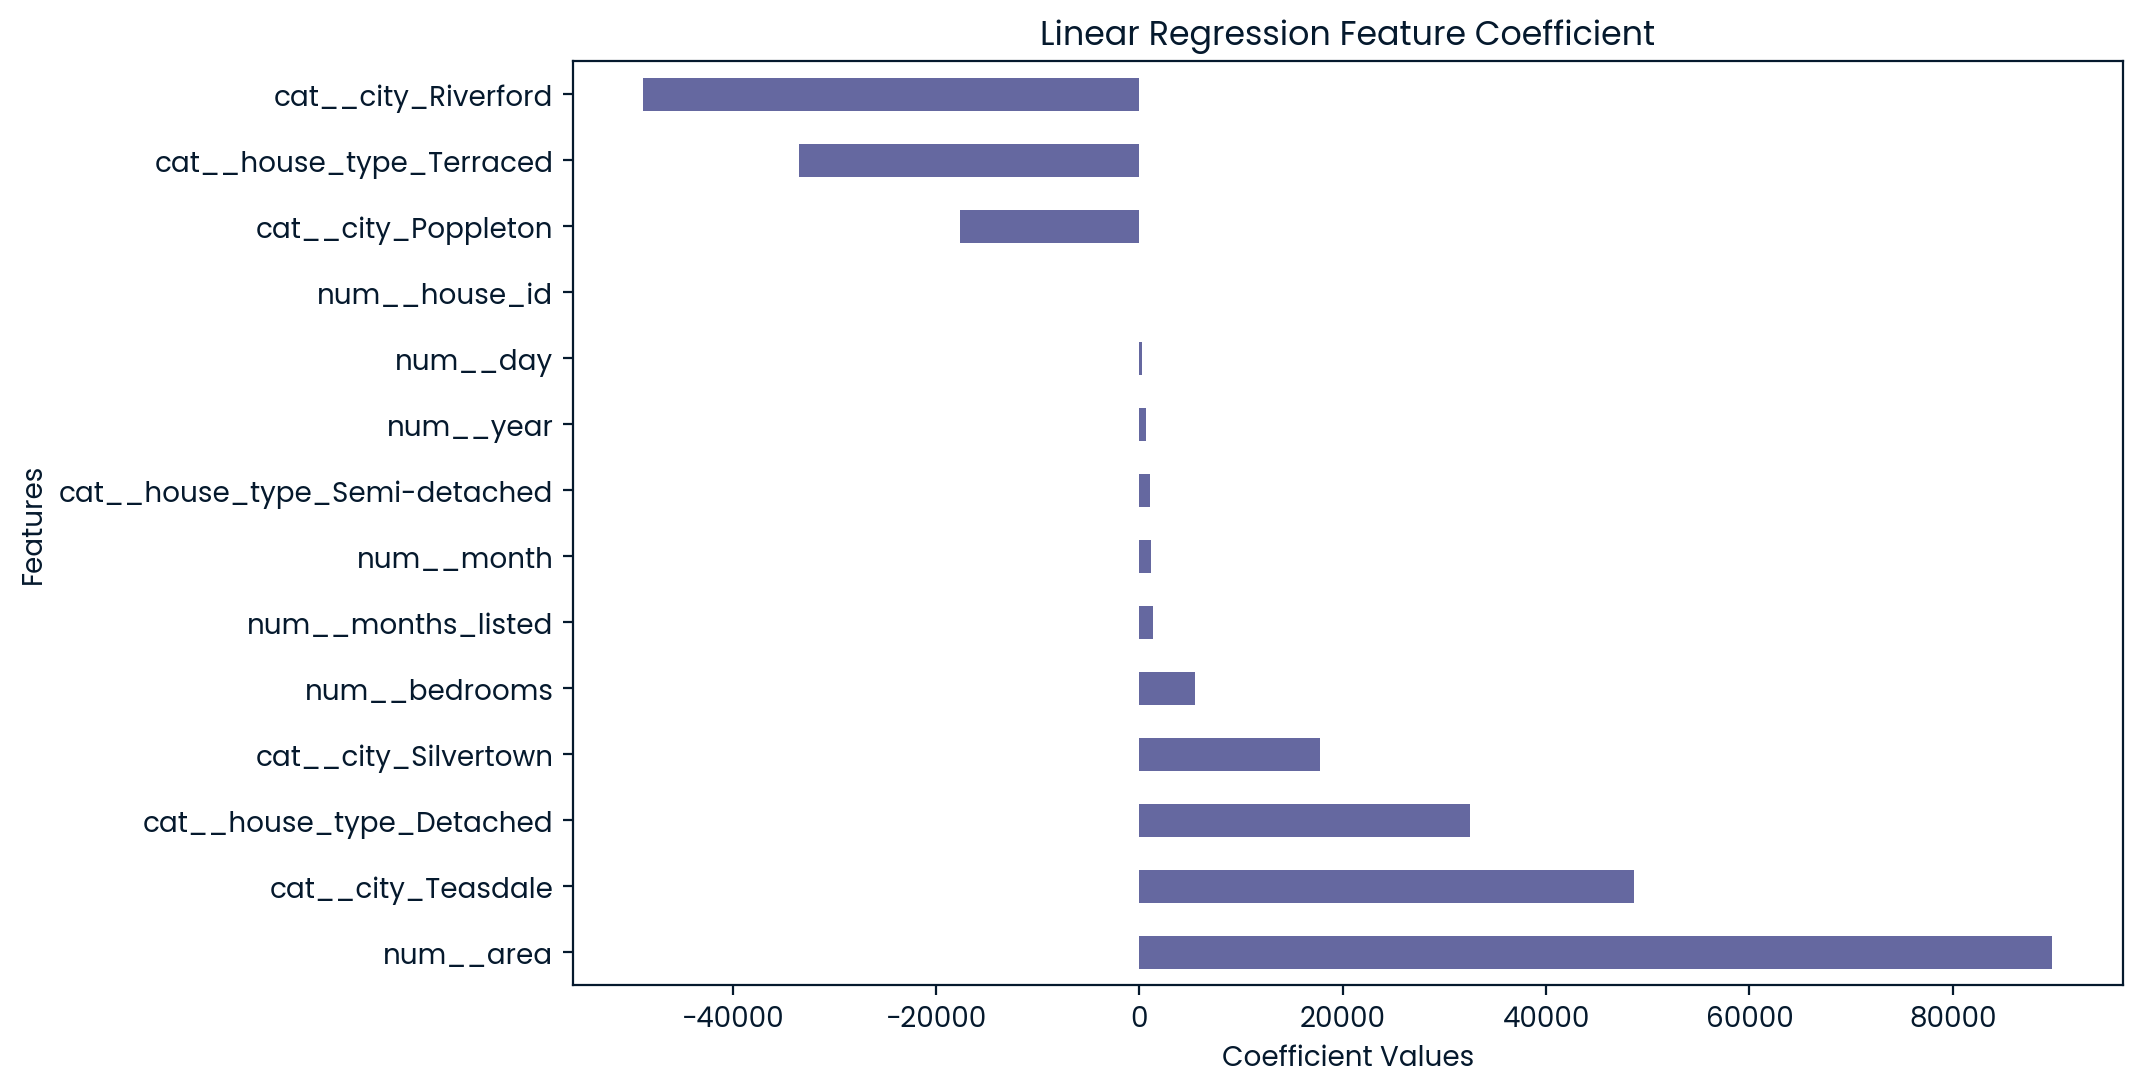

In [39]:
# import relevant library
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score, KFold
from sklearn.metrics import mean_squared_error


# load the data set
train = pd.read_csv('train.csv')
train_org = train.copy()
validation = pd.read_csv('validation.csv')
validation_org = validation.copy()

# Convert the sale_date column object to datetime
train['sale_date'] = pd.to_datetime(train['sale_date'])

# Create new columns day,month, year as Linear Regression doesnt digest the datetime64 (for training data)
train['year'] = train['sale_date'].dt.year
train['month'] = train['sale_date'].dt.month
train['day'] = train['sale_date'].dt.day
#drop the original column
train.drop('sale_date',axis=1,inplace=True)

# split feature by data type (we tree bedrooms as numeric in linear as they have shown to meet the assumption of target variable rises as the BR rises)
num_features =['house_id','months_listed','bedrooms','area','year','month','day']
cat_features =['city','house_type']

# Build X and y
X = train[num_features+cat_features]
y =train['sale_price']

# train test split data
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

# Preprocessing pipeline
num_pipeline = Pipeline([('scaler',StandardScaler())])

cat_pipeline = Pipeline([('encoder',OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([('num',num_pipeline,num_features),('cat',cat_pipeline,cat_features)])

# Connect pipeline to the model
pipe_lng = Pipeline([('prep',preprocessor),('lng',LinearRegression())])

# fit the data to the model
model_lng=pipe_lng.fit(X_train,y_train)

# predict
y_predict = model_lng.predict(X_test)

# find R-square
r_squared =  model_lng.score(X_test,y_test)
print(f'The R-square value is: {r_squared}')

# find the RMSE
rmse = np.sqrt(mean_squared_error(y_test,y_predict,squared=False))
print(f'The RMSE value is: {rmse}')


# Create K Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# cross validation score on the unseen data
cv_scores = cross_val_score(model_lng,X,y,cv=kf)
print(cv_scores)
print(f'Average cv_score is {cv_scores.mean()}')


# Convert the sale_date column object to datetime
validation['sale_date'] = pd.to_datetime(validation['sale_date'])
# Create new columns day,month, year as Linear Regression doesnt digest the datetime64 (for validation)
validation['year'] = validation['sale_date'].dt.year
validation['month'] = validation['sale_date'].dt.month
validation['day'] = validation['sale_date'].dt.day
#drop the original column
validation.drop('sale_date',axis=1,inplace=True)


# Predict on the validation data set
validation['prediction'] = model_lng.predict(validation)

# return only house_id and prediction
base_result = validation[['house_id','prediction']]

# rename the columns
base_result.columns = ['house_id','Predicted_sale']

# round to 2 decimal place
base_result['Predicted_sale'] = round(base_result['Predicted_sale'],2)


### Feature importance in the Linear Regression

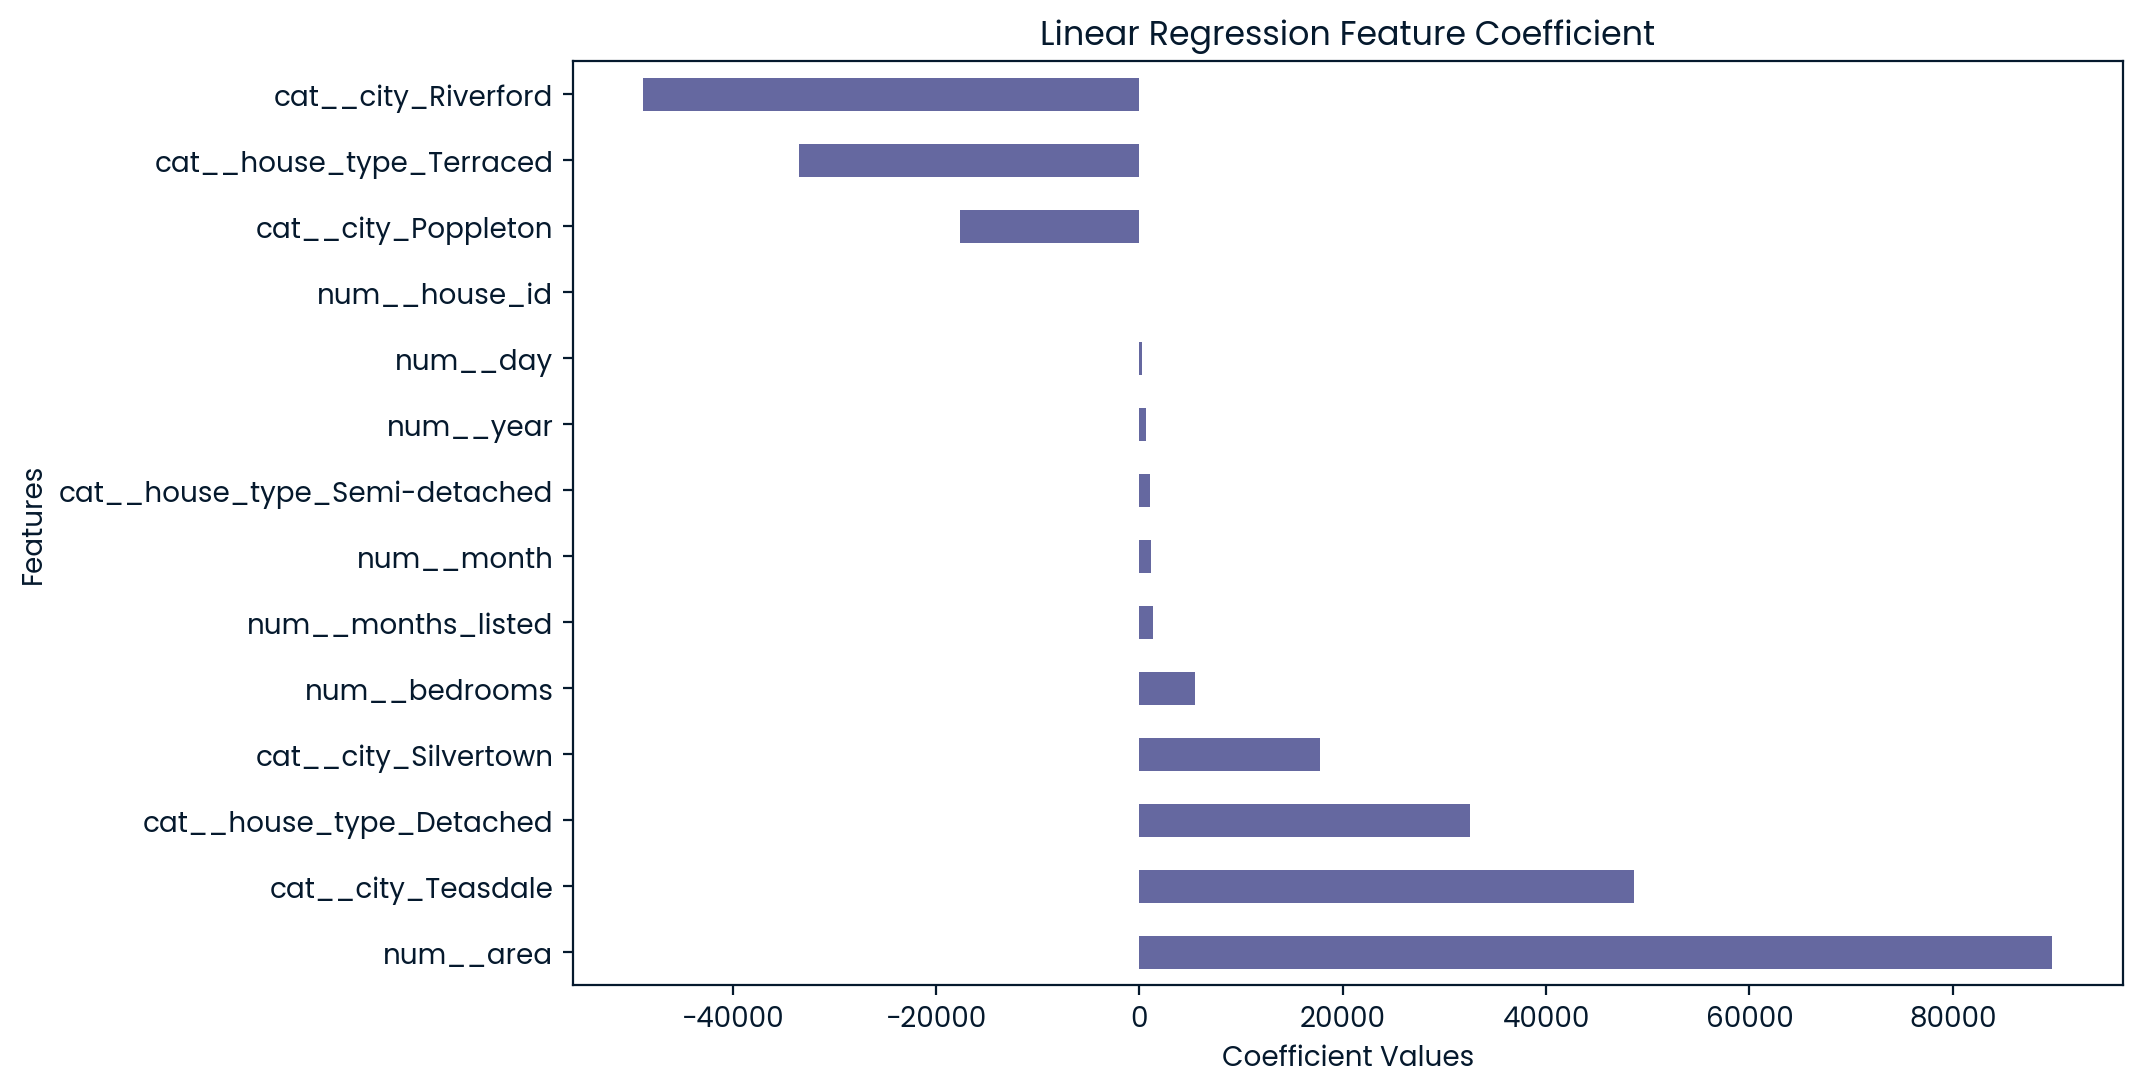

In [40]:
## Feature importance
# Get the coefficients
model_lng_coef = model_lng.named_steps['lng'].coef_

# Get the intercept
model_lng_intercept = model_lng.named_steps['lng'].intercept_
model_lng_intercept

# get featured names from the processed pipeline
feature_names = model_lng.named_steps['prep'].get_feature_names_out()

# match the array of coefficients to the columns
feature_coef_series = pd.Series(model_lng_coef,index=feature_names).sort_values()

# extract the top features
top_features_lng = feature_coef_series.index.to_list()


# set up canvas and plot the data
plt.figure(figsize=(10, 6))

feature_coef_series.plot(kind='barh')  # we include abs as some relations are inverse or negative
plt.title('Linear Regression Feature Coefficient')
plt.xlabel('Coefficient Values')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

### Decision Tree Regressor

The base DecisoinTreeRegressor r square value is 0.976, rmse USD 136.59 and average CV score is 0.9735. This tell that model fits well to the data while the rmse is USD 136.59 which is very low error of varaince between the actual and predicted; better performance than the linear regression.

The model works well on the unseen data, evident by average score of 0.9735

In [14]:
# import CART
from sklearn.tree import DecisionTreeRegressor

# connect pipeline to the mode
pipe_dtr = Pipeline([('prep',preprocessor),('dtr',DecisionTreeRegressor())])

# fit the data to the pipeline and mode
model_dtr = pipe_dtr.fit(X_train,y_train)

# predict
y_predict = model_dtr.predict(X_test)

# find R-square
r_squared_base =  model_dtr.score(X_test,y_test)
print(f'The R-square value of base DTR is: {r_squared_base}')

# find the RMSE
rmse_base = np.sqrt(mean_squared_error(y_test,y_predict,squared=False))
print(f'The RMSE value of base DTR is: {rmse_base}')

# Create K Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# cross validation score on the unseen data
cv_scores_base = cross_val_score(model_dtr,X,y,cv=kf)
print(cv_scores_base)
print(f'Average cv_score is {cv_scores_base.mean()}','\n')

# Set the param grid
param_grid = {
    'dtr__max_depth': [None, 5, 10, 15],
    'dtr__min_samples_split': [2, 5, 10],
    'dtr__min_samples_leaf': [1, 2, 4],
    'dtr__criterion': ['squared_error', 'poisson', 'friedman_mse', 'absolute_error']
}

# Grid search cv to tune
grid_model_dtr = GridSearchCV(estimator=pipe_dtr,param_grid=param_grid, cv=5,scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)

# fit the data to the grid search model
grid_model_dtr.fit(X_train,y_train)

# predict
y_predict_grd = grid_model_dtr.predict(X_test)

print(grid_model_dtr.best_params_,'\n')

# find R-square
r_squared_tuned =  grid_model_dtr.score(X_test,y_test)
print(f'The R-square value of tuned DTR is: {r_squared_tuned}')

# find the RMSE
rmse_tuned = np.sqrt(mean_squared_error(y_test,y_predict,squared=False))
print(f'The RMSE value of tuned DTR is: {rmse_tuned}')

# cross validation score on the unseen data
cv_scores_tuned = cross_val_score(grid_model_dtr,X,y,cv=kf)
print(cv_scores_tuned)
print(f'Average cv_score is {cv_scores_tuned.mean()}','\n')

The R-square value of base DTR is: 0.9766127224301786
The RMSE value of base DTR is: 135.95390920549164
[0.97646603 0.97678357 0.97080023 0.9749402  0.97272216]
Average cv_score is 0.9743424365995448 

Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'dtr__criterion': 'squared_error', 'dtr__max_depth': None, 'dtr__min_samples_leaf': 4, 'dtr__min_samples_split': 10} 

The R-square value of tuned DTR is: -16388.33524284428
The RMSE value of tuned DTR is: 135.95390920549164
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
[-16318.44820636 -15534.28817256 -18055.47360498 -16782.14193781
 -15671.52530191]
Average cv_score is -16472.375444725454 



### Feature importance in the Decision Tree Classifier

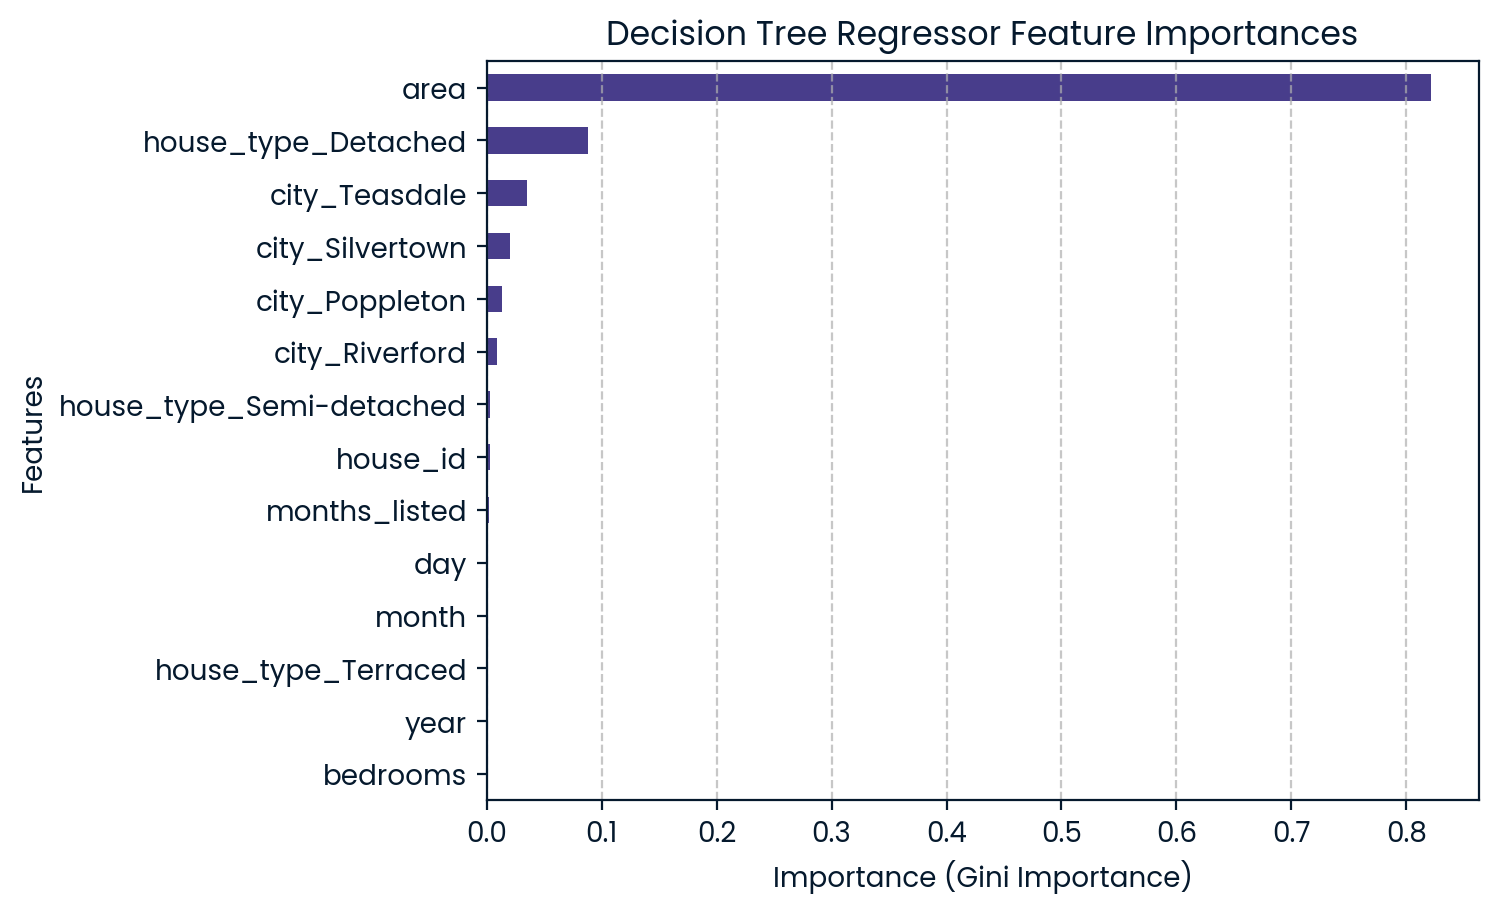

In [43]:
# Access the model from the pipeline using named_steps
dtr_model_pipeline = model_dtr.named_steps['dtr']

# Access the feature importance
dtr_feature_importance = dtr_model_pipeline.feature_importances_

# Access the preprocessor (cuz the arrays from the feature_importances are from prepocessed results)
fitted_processor = model_dtr.named_steps['prep']

# convert numeric columns to list (no need as we store that in list already before creating X/feature)
num_features

# get encoded columns name
one_hot_encoded_names = fitted_processor.named_transformers_['cat'].get_feature_names_out(cat_features).tolist()

# combined all the processed feature names
all_processed_feature_names = num_features+ one_hot_encoded_names

# create pandas series
feature_importance_series = pd.Series(dtr_feature_importance, index=all_processed_feature_names).sort_values(ascending=False)

feature_importance_series.plot(kind='barh', color='darkslateblue')
plt.title('Decision Tree Regressor Feature Importances')
plt.xlabel('Importance (Gini Importance)')
plt.ylabel('Features')
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.show()

In [ ]:
# Access the model from the pipeline using named_steps
dtc_model_pipeline = base_dtc_model.named_steps['model']

# Access the feature importance
dtc_feature_importance = dtc_model_pipeline.feature_importances_

# Access the preprocessor (cuz the arrays from the feature_importances are from prepocessed results)
fitted_processor = base_dtc_model.named_steps['pipe']

# convert numeric columns to list (no need as we store that in list already before creating X/feature)
num_features

# get encoded columns name
one_hot_encoded_names = fitted_processor.named_transformers_['cat'].get_feature_names_out(cat_features).tolist()

# combined all the processed feature names
all_processed_feature_names = num_features+ one_hot_encoded_names

# create pandas series
feature_importance_series = pd.Series(dtc_feature_importance, index=all_processed_feature_names).sort_values(ascending=False)

feature_importance_series.plot(kind='barh', color='darkslateblue')
plt.title('Decision Tree Classifier Feature Importances')
plt.xlabel('Importance (Gini Importance)')
plt.ylabel('Features')
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.show()

## Model Performance Comparison

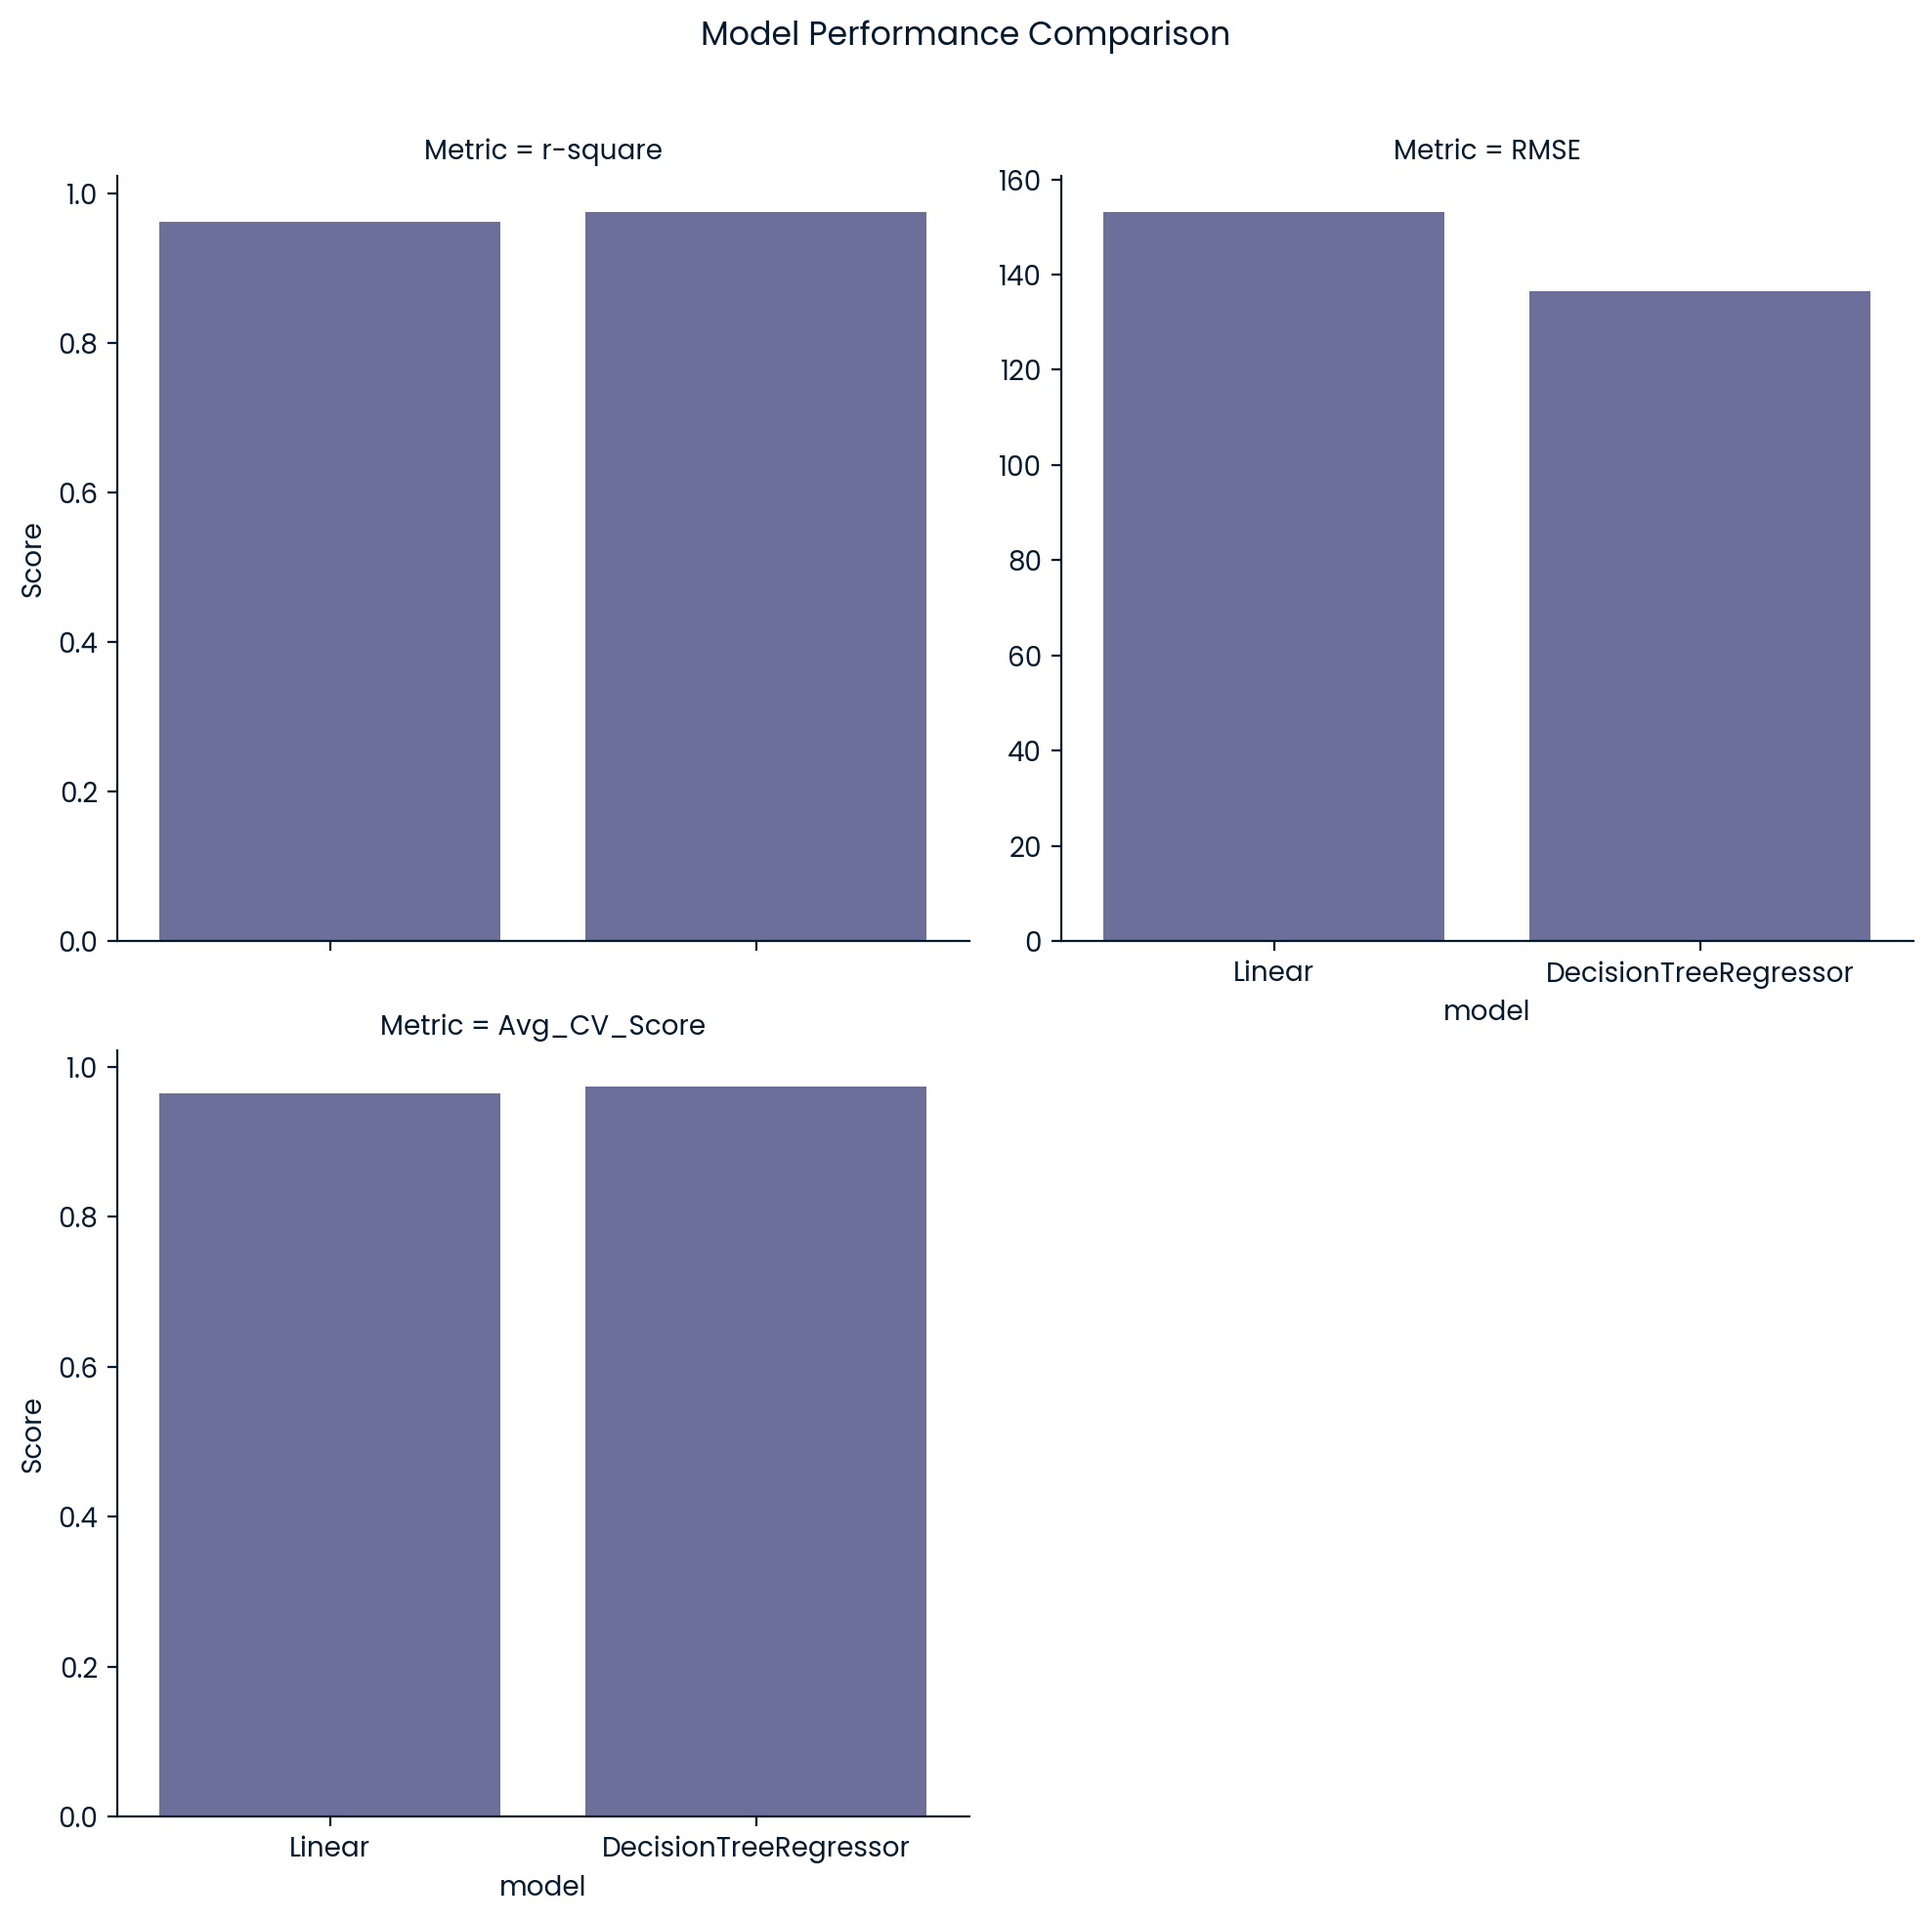

In [22]:
# Create a dictionary for the results
model_result = {'model':['Linear','DecisionTreeRegressor'], 'r-square':[0.96232,0.976], 'RMSE':[153.1667,136.59], "Avg_CV_Score":[0.9653,0.9735]}

# convert to data frame
model_result_df = pd.DataFrame(model_result)

# melt the data to long format
melt_model_result_df =model_result_df.melt(id_vars = 'model',var_name='Metric',value_name='Score')

# plot the model comparison
g = sns.catplot(
    data=melt_model_result_df,
    x="model", y="Score",
    col="Metric",
    kind="bar",
    col_wrap=2,  # wrap if you have many metrics
    sharey=False  # each metric has its own scale
)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Model Performance Comparison")
plt.show()